# <span style = "font-style:italic;color:skyblue"> CREDIT SCORE CLASSIFICATION <span>

**[`Business Objective: Predict the Credit worthiness of individuals based on their Financial Profiles and the company has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts.`](#dd)**

# <span style = "font-style:italic;color:skyblue"> TOPICS : <span>
1. **[`Dataset Description`](#dd)**
2. **[`Required Libraries`](#rl)**    
3. **[`Dataset`](#ds)**
4. **[`Basic Analysis`](#ba)**<br>
        4.1 **[`Shape`](#sh)**<br>
        4.2 **[`Size`](#si)**<br>
        4.3 **[`Duplicates`](#dup)**<br>
        4.4 **[`Data Types`](#dt)**<br>
        4.5 **[`functions`](#f)**<br>
        4.6 **[`Data Cleaning`](#dc)**<br>
5. **[`Missing Value Analysis`](#mva)** 
6. **[`Visualization`](#v)**    
7. **[`Outlier Treatment`](#ot)**    
        
8. **[`Statistical Analysis`](#sa)**<br>
        8.1 **[`Describe`](#de)**<br>
        8.2 **[`Skewness`](#sk)**<br>
        8.3 **[`Kurtosis`](#ku)**<br>
        8.4 **[`Hypothesis Testing`](#hyp)**
9. **[`Model Building`](#mbd)**<br>
        9.1 **[`Encoding Target Variables`](#etv)**<br>
        9.2 **[`Drop Unnecessary Columns`](#dcl)**<br>
        9.3 **[`Encoding Categorical Columns`](#ecc)**<br>
        9.4 **[`Base Model`](#bml)**<br>
        9.5 **[`Multi Collinearity Checking`](#mclc)**<br>
        9.6 **[`Feature Importance`](#fi)**<br>
        9.7 **[`Final Model`](#final)**<br>

<a id = "dd"></a>
# <span style = "font-style:italic;color:skyblue"> DATASET DESCRIPTION : <span>

<span style = "font-style:italic;color:red">**`ID`**<span> -- Represents a unique identification of an entry<br>
**`Customer_ID`** -- Represents a unique identification of a person<br>
**`Month`** -- Represents the month of the year<br>
**`Name`** -- Represents the name of a person<br>
**`Age`** -- Represents the age of the person<br>
**`SSN`** -- Represents the social security number of a person<br>
**`Occupation`** -- Represents the occupation of the person<br>
**`Annual_Income`** -- Represents the annual income of the person<br>
**`Monthly_Inhand_Salary`** -- Represents the monthly base salary of a person<br>
**`Num_Bank_Accounts`** -- Represents the number of bank accounts a person holds<br>
**`Num_Credit_Card`** -- Represents the number of other credit cards held by a person<br>
**`Interest_Rate`** -- Represents the interest rate on credit card<br>
**`Num_of_Loan`** -- Represents the number of loans taken from the bank<br>
**`Type_of_Loan`** -- Represents the types of loan taken by a person<br>
**`Delay_from_due_date`** -- Represents the average number of days delayed from the payment date<br>
**`Num_of_Delayed_Payment`** -- Represents the average number of payments delayed by a person<br><br>
**`Changed_Credit_Limit`** -- Represents the percentage change in credit card limit<br>
**`Num_Credit_Inquiries`** -- Represents the number of credit card inquiries<br>
**`Credit_Mix`** -- Represents the classification of the mix of credits<br>
**`Outstanding_Debt`** -- Represents the remaining debt to be paid (in USD)<br>
**`Credit_Utilization_Ratio`** -- Represents the utilization ratio of credit card<br>
**`Credit_History_Age`** -- Represents the age of credit history of the person<br>
**`Payment_of_Min_Amount`** -- Represents whether only the minimum amount was paid by the person<br>
**`Total_EMI_per_month`** -- Represents the monthly EMI payments (in USD)<br>
**`Amount_invested_monthly`** -- Represents the monthly amount invested by the customer (in USD)<br>
**`Payment_Behaviour`** -- Represents the payment behaviour of the customer (in USD)<br>
**`Monthly_Balance`** -- Represents the monthly balance amount of the customer (in USD)<br>
#### Dependent Variable:<br>
<span style = "font-style:italic;color:red">**`Credit_Score`**<span> -- Represents the bracket of credit score (Poor, Standard, Good)<br>

<a id = "rl"></a>
# <span style = "font-style:italic;color:skyblue"> REQUIRED LIBRARIES : <span>

In [2]:
import pandas as pd

import numpy as np

from warnings import filterwarnings
filterwarnings("ignore")

import seaborn as sns

import matplotlib.pyplot as plt

import plotly.express as px

from scipy.stats import shapiro

from scipy.stats import levene

from scipy.stats import f_oneway

from scipy.stats import chi2_contingency

import statsmodels.api as sm
from statsmodels.stats.multicomp import MultiComparison

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split , GridSearchCV

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import classification_report

from sklearn.metrics import f1_score

from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import GradientBoostingClassifier


<a id = "ds"></a>
# <span style = "font-style:italic;color:skyblue"> DATASET : <span>

In [3]:
credit_card = pd.read_csv("train.csv")
credit_card.head()

ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     Credit_History_Age  \
0            809.98                26.822620  22 Years and 1 Months   
1            809.98                31.944960                    NaN   
2            809.98                28.609352  22 Years and 3 Months   
3            809.98                31.377862  22 Years and 4 Months   
4            809.98                24.797347  22 Years and 5 Months   

   Payment_of_Min_Amount Total_EMI_per_month Amount_invested_monthly  \
0                     No           49.574949             80.41529544   
1                     No           49.574949             118.2802216   
2                     No           49.574949             81.69952126   
3                     No           49.574949             199.4580744   
4                     No           49.574949             41.42015309   

                  Payment_Behaviour Monthly_Balance Credit_Score  
0   High_spent_Small_value_payments     312.4940887         Good  
1    Low_spent_Large_value_payments     284.6291625         Good  
2   Low_spent_Medium_value_payments     331.2098629         Good  
3    Low_spent_Small_value_payments     223.4513097         Good  
4  High_spent_Medium_value_payments      341.489231         Good  

[5 rows x 28 columns]

<a id = "ba"></a>
# <span style = "font-style:italic;color:skyblue"> BASIC ANALYSIS : <span>

<a id = "sh"></a>
## <span style = "font-style:italic;color:black"> SHAPE <span>

In [4]:
# by using ".shape" we can get the number of rows and number of columns presented in the dataset

In [5]:
print(f' the number of rows = {credit_card.shape[0]} and the number of columns = {credit_card.shape[1]}')

 the number of rows = 100000 and the number of columns = 28


<a id = "si"></a>
## <span style = "font-style:italic;color:black"> SIZE <span>

In [6]:
# by using ".size" we can get the total number of value presented in the dataset or product of number of rows and columns

In [7]:
credit_card.size

2800000

<a id = "dup"></a>
## <span style = "font-style:italic;color:black"> DUPLICATES <span>

In [8]:
credit_card.duplicated().any()

False

In [9]:
# here there is no duplicate values presented in our dataset.

<a id = "dt"></a>
## <span style = "font-style:italic;color:black"> DATA TYPES <span>

In [10]:
# by using ".dtypes" we can get the data tpes of each variables(columns) presented in the dataset

In [11]:
credit_card.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [12]:
# by using ".info" we can get the datatypes of each variables and also we can get the number of not null values presented in the dataset

In [13]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [14]:
# from this we can able to see some numerical column's dtypes in the form of object so we are going to change it.

In [15]:
# so we can see the columns like "Outstanding_Debt" , "Amount_invested_monthly" , "Monthly_Balance" , "Changed_Credit_Limit",
# "Credit_Mix" , "Occupation" ,  "Payment_Behaviour" also have some symbols so we need to do so changes

In [16]:
# "Credit_History_Age" in this column we can see the values in the form of "22 Years and 1 Months" so we are going to convert it.
# in the form of numerical values like "22 1/12".

<a id = "f"></a>
## <span style = "font-style:italic;color:black"> FUNCTIONS <span>

In [17]:
def clean_and_convert_to_int(df, column_name):
    """
    Clean a column in a DataFrame by removing non-numeric characters and convert it to integers.
    
    Args:
    - df: DataFrame
        The DataFrame containing the column to be cleaned and converted.
    - column_name: str
        The name of the column to be cleaned and converted.
    
    Returns:
    - DataFrame or None:
        The DataFrame with the specified column cleaned and converted to integers,
        or None if the column does not exist in the DataFrame.
    """
    # Check if the specified column exists in the DataFrame
    if column_name not in df.columns:
        print(f"Column '{column_name}' does not exist in the DataFrame.")
        return None
    
    # Check if the column contains any non-numeric characters
    if pd.api.types.is_numeric_dtype(df[column_name]):
        print(f"Column '{column_name}' is already numeric.")
    else:
        # Convert the column to strings and remove non-numeric characters
        df[column_name] = df[column_name].astype(str).str.replace(r'\D', '')
    
    # Convert the cleaned column to integers
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce', downcast='integer')
    
    return df


In [18]:
def remove_and_convert_to_int(df, column_name):
    """
    Clean a column in a DataFrame by removing non-numeric characters and convert it to integers.
    
    Args:
    - df: DataFrame
        The DataFrame containing the column to be cleaned and converted.
    - column_name: str
        The name of the column to be cleaned and converted.
    
    Returns:
    - DataFrame or None:
        The DataFrame with the specified column cleaned and converted to integers,
        or None if the column does not exist in the DataFrame.
    - int: The number of missing values (NaN) introduced by replacing underscores.
    """
    # Check if the specified column exists in the DataFrame
    if column_name not in df.columns:
        print(f"Column '{column_name}' does not exist in the DataFrame.")
        return None, None
    
    # Replace '_' with NaN values
    num_missing_values = df[column_name].str.count('_').sum()
    df[column_name] = df[column_name].replace('_', np.nan)
    
    # Check if the column contains any non-numeric characters
    if pd.api.types.is_numeric_dtype(df[column_name]):
        print(f"Column '{column_name}' is already numeric.")
    else:
        # Convert the column to strings and remove non-numeric characters
        df[column_name] = df[column_name].astype(str).str.replace(r'\D', '')
    
    # Convert the cleaned column to integers
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce', downcast='integer')
    
    return df, num_missing_values

In [19]:
def fill_nan_with_mode(df, column_name, groupby_column):
    """
    Fill NaN values in a column with the mode values grouped by another column.
    
    Args:
    - df: DataFrame
        The DataFrame containing the column with NaN values.
    - column_name: str
        The name of the column with NaN values to be filled.
    - groupby_column: str
        The name of the column to group by for calculating mode values.
    
    Returns:
    - DataFrame:
        The DataFrame with NaN values in the specified column filled with mode values.
    """
    # Calculate mode values within each group
    mode_values = df.groupby(groupby_column)[column_name].transform(lambda x: x.mode().iloc[0])
    
    # Fill NaN values with mode values
    df[column_name] = df[column_name].fillna(mode_values)
    
    return df

In [20]:
def replace_values_with_mode(df, column_name, groupby_column):
    """
    replace values in a column with the mode values grouped by another column.
    
    Args:
    - df: DataFrame
        The DataFrame containing the column with mismatch values.
    - column_name: str
        The name of the column with mismatch values are changed.
    - groupby_column: str
        The name of the column to group by for calculating mode values.
    
    Returns:
    - DataFrame:
        The DataFrame with mismatch values in the specified column filled with mode values.
    """
    # Calculate mode values within each group
    df[column_name] = df.groupby(groupby_column)[column_name].transform(lambda x: x.mode().iloc[0])
    return df

In [21]:
def fill_nan_with_median(df, column_name, groupby_column):
    """
    Fill NaN values in a column with the median values grouped by another column.
    
    Args:
    - df: DataFrame
        The DataFrame containing the column with NaN values.
    - column_name: str
        The name of the column with NaN values to be filled.
    - groupby_column: str
        The name of the column to group by for calculating median values.
    
    Returns:
    - DataFrame:
        The DataFrame with NaN values in the specified column filled with median values.
    """
    # Calculate median values within each group
    median_values = df.groupby(groupby_column)[column_name].transform('median')
    
    # Fill NaN values with median values
    df[column_name] = df[column_name].fillna(median_values)
    
    return df

In [22]:
def remove_and_convert_to_str(df, column_name):
    """
    Replace underscore values with NaN in a categorical column of a DataFrame.
    
    Args:
    - df: DataFrame
        The DataFrame containing the column with underscore values.
    - column_name: str
        The name of the categorical column in which underscores should be replaced with NaN.
    
    Returns:
    - DataFrame:
        The DataFrame with underscore values replaced with NaN in the specified column.
    """
    # Replace underscore values with NaN
    df[column_name] = df[column_name].replace('_', np.nan)
    
    return df

In [23]:
def remove_and_convert_to_nan(df, column_name):
    """
    Replace underscore values with NaN in a categorical column of a DataFrame.
    
    Args:
    - df: DataFrame
        The DataFrame containing the column with underscore values.
    - column_name: str
        The name of the categorical column in which underscores should be replaced with NaN.
    
    Returns:
    - DataFrame:
        The DataFrame with underscore values replaced with NaN in the specified column.
    """
    # Replace underscore values with NaN
    df[column_name] = df[column_name].replace('_______', np.nan)
    
    return df

In [24]:
def remove_symbol_and_convert_to_nan(df, column_name):
    """
    Replace underscore values with NaN in a categorical column of a DataFrame.
    
    Args:
    - df: DataFrame
        The DataFrame containing the column with underscore values.
    - column_name: str
        The name of the categorical column in which underscores should be replaced with NaN.
    
    Returns:
    - DataFrame:
        The DataFrame with underscore values replaced with NaN in the specified column.
    """
    # Replace underscore values with NaN
    df[column_name] = df[column_name].replace('!@9#%8', np.nan)
    
    return df

In [25]:
def convert_to_numerical_age(df, column_name):
    """
    Convert values in a column containing years and months to a numerical value.
    
    Args:
    - df: DataFrame
        The DataFrame containing the column to be converted.
    - column_name: str
        The name of the column to be converted.
    
    Returns:
    - DataFrame:
        The DataFrame with the values in the specified column converted to a numerical format.
    """
    # Extract years and months using regular expressions
    years = df[column_name].str.extract(r'(\d+) Years?').astype(float)
    months = df[column_name].str.extract(r'(\d+) Months?').astype(float)
    
    # Calculate total duration in years with a fractional part for the months
    df[column_name] = years + (months / 12)
    
    return df

In [26]:
def replace_negatives_and_above_threshold(df , column , i):
    
    df[column] = df[column].apply(lambda x: np.nan if x < 0 or x > i else x)
    
    return df

In [27]:
def remove_underage_groups(df , column):
    # Identify Customer_IDs with all ages less than 18
    underage_ids = df.groupby('Customer_ID')[column].apply(lambda x: (x < 18).all())
    
    # Get the Customer_IDs where all ages are less than 18
    underage_customer_ids = underage_ids[underage_ids].index
    
    # Drop rows associated with Customer_IDs where all ages are less than 18
    df.drop(df[df['Customer_ID'].isin(underage_customer_ids)].index , inplace = True)
    
    return df

In [28]:
def remove_none_type_loan(df , column):
    # Identify Customer_IDs with all type of loans is null
    none_type = df.groupby('Customer_ID')[column].apply(lambda x: x.isna().all())
    
    # Get the Customer_IDs where all type of loans is null
    none_type_customer_ids = none_type[none_type].index
    
    # Drop rows associated with Customer_IDs where all type of loans is null
    df.drop(df[df['Customer_ID'].isin(none_type_customer_ids)].index , inplace = True)
    
    return df

In [29]:
def process_column(df , column , i):
    # Convert negative values to positive
    df[column] = df[column].apply(lambda x: abs(x))
    
    # Convert values greater than i to NaN
    df[column] = df[column].apply(lambda x: np.nan if x > i else x)
    
    return df

In [30]:
def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = data.columns
    vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_data.sort_values(by = "VIF" , ascending= False)

In [31]:
def calculate_f1_score(model, X_test, y_test, model_name, f1_df):
    # Make predictions on the testing data
    y_pred = model.predict(X_test)
    
    # Calculate F1-score for the model
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Append the F1-score to the DataFrame
    f1_df = f1_df.append({'Model': model_name, 'F1-score': f1}, ignore_index=True)
    
    return f1_df

In [32]:
def find_best_parameters(model, param_grid, X_train, y_train):     
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')     
    grid_search.fit(X_train, y_train)     
    best_params = grid_search.best_params_     
    best_score = grid_search.best_score_     
    return best_params ,best_score

<a id = "dc"></a>
## <span style = "font-style:italic;color:black"> DATA CLEANING <span>

In [33]:
# here we are going to data cleaning on each and every columns those are having different dtypes

In [34]:
clean_and_convert_to_int(credit_card , "Age")

ID Customer_ID     Month           Name    Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh   23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh   23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh -500.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh   23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh   23.0  821-00-0265   
...        ...         ...       ...            ...    ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks   25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks   25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks   25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks   25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks   25.0  078-73-5990   

      Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0      Scientist      19114.12            1824.843333                  3  ...   
1      Scientist      19114.12                    NaN                  3  ...   
2      Scientist      19114.12                    NaN                  3  ...   
3      Scientist      19114.12                    NaN                  3  ...   
4      Scientist      19114.12            1824.843333                  3  ...   
...          ...           ...                    ...                ...  ...   
99995   Mechanic      39628.99            3359.415833                  4  ...   
99996   Mechanic      39628.99            3359.415833                  4  ...   
99997   Mechanic      39628.99            3359.415833                  4  ...   
99998   Mechanic      39628.99            3359.415833                  4  ...   
99999   Mechanic     39628.99_            3359.415833                  4  ...   

       Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio  \
0               _            809.98                26.822620   
1            Good            809.98                31.944960   
2            Good            809.98                28.609352   
3            Good            809.98                31.377862   
4            Good            809.98                24.797347   
...           ...               ...                      ...   
99995           _            502.38                34.663572   
99996           _            502.38                40.565631   
99997        Good            502.38                41.255522   
99998        Good            502.38                33.638208   
99999        Good            502.38                34.192463   

           Credit_History_Age  Payment_of_Min_Amount Total_EMI_per_month  \
0       22 Years and 1 Months                     No           49.574949   
1                         NaN                     No           49.574949   
2       22 Years and 3 Months                     No           49.574949   
3       22 Years and 4 Months                     No           49.574949   
4       22 Years and 5 Months                     No           49.574949   
...                       ...                    ...                 ...   
99995   31 Years and 6 Months                     No           35.104023   
99996   31 Years and 7 Months                     No           35.104023   
99997   31 Years and 8 Months                     No           35.104023   
99998   31 Years and 9 Months                     No           35.104023   
99999  31 Years and 10 Months                     No           35.104023   

      Amount_invested_monthly                 Payment_Behaviour  \
0                 80.41529544   High_spent_Small_value_payments   
1                 118.2802216    Low_spent_Large_value_payments   
2                 81.69952126   Low_spent_Medium_value_payments   
3                 199.4580744    Low_spent_Small_value_payments   
4                 41.42015309  High_spent_Medium_value_payments   
...                       ...                         

In [35]:
credit_card.Age.describe()

count    95061.000000
mean       110.934505
std        689.407864
min       -500.000000
25%         24.000000
50%         33.000000
75%         42.000000
max       8698.000000
Name: Age, dtype: float64

In [36]:
# From this we can see that we have negative values and huge values in the Age variables

In [37]:
num_negative_values = (credit_card["Age"] < 18).sum()
num_very_large_values = (credit_card["Age"] > 60).sum()
print("Number of negative values:", num_negative_values)
print("Number of very large values:", num_very_large_values)

Number of negative values: 6319
Number of very large values: 1810


In [38]:
clean_and_convert_to_int(credit_card , "Annual_Income")

ID Customer_ID     Month           Name    Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh   23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh   23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh -500.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh   23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh   23.0  821-00-0265   
...        ...         ...       ...            ...    ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks   25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks   25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks   25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks   25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks   25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic            NaN            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio  \
0      ...           _            809.98                26.822620   
1      ...        Good            809.98                31.944960   
2      ...        Good            809.98                28.609352   
3      ...        Good            809.98                31.377862   
4      ...        Good            809.98                24.797347   
...    ...         ...               ...                      ...   
99995  ...           _            502.38                34.663572   
99996  ...           _            502.38                40.565631   
99997  ...        Good            502.38                41.255522   
99998  ...        Good            502.38                33.638208   
99999  ...        Good            502.38                34.192463   

           Credit_History_Age  Payment_of_Min_Amount Total_EMI_per_month  \
0       22 Years and 1 Months                     No           49.574949   
1                         NaN                     No           49.574949   
2       22 Years and 3 Months                     No           49.574949   
3       22 Years and 4 Months                     No           49.574949   
4       22 Years and 5 Months                     No           49.574949   
...                       ...                    ...                 ...   
99995   31 Years and 6 Months                     No           35.104023   
99996   31 Years and 7 Months                     No           35.104023   
99997   31 Years and 8 Months                     No           35.104023   
99998   31 Years and 9 Months                     No           35.104023   
99999  31 Years and 10 Months                     No           35.104023   

      Amount_invested_monthly                 Payment_Behaviour  \
0                 80.41529544   High_spent_Small_value_payments   
1                 118.2802216    Low_spent_Large_value_payments   
2                 81.69952126   Low_spent_Medium_value_payments   
3                 199.4580744    Low_spent_Small_value_payments   
4                 41.42015309  High_spent_Medium_value_payments   
...                       ...             

In [39]:
credit_card.Annual_Income.describe()

count    9.302000e+04
mean     1.785790e+05
std      1.442878e+06
min      7.005930e+03
25%      1.943560e+04
50%      3.755074e+04
75%      7.284338e+04
max      2.419806e+07
Name: Annual_Income, dtype: float64

<span style = font-style:bold;color:blue>here out max annual salary is 24 Millions so we need to group by the customer id and check the value whether it is correct or not<span>

<span style = font-style:bold;color:blue>**`Annual_Income`**<span> : Replacing the mismatched values  with the mode grouped by customer id.

In [40]:
replace_values_with_mode(credit_card , "Annual_Income" , "Customer_ID")

ID Customer_ID     Month           Name    Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh   23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh   23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh -500.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh   23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh   23.0  821-00-0265   
...        ...         ...       ...            ...    ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks   25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks   25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks   25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks   25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks   25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio  \
0      ...           _            809.98                26.822620   
1      ...        Good            809.98                31.944960   
2      ...        Good            809.98                28.609352   
3      ...        Good            809.98                31.377862   
4      ...        Good            809.98                24.797347   
...    ...         ...               ...                      ...   
99995  ...           _            502.38                34.663572   
99996  ...           _            502.38                40.565631   
99997  ...        Good            502.38                41.255522   
99998  ...        Good            502.38                33.638208   
99999  ...        Good            502.38                34.192463   

           Credit_History_Age  Payment_of_Min_Amount Total_EMI_per_month  \
0       22 Years and 1 Months                     No           49.574949   
1                         NaN                     No           49.574949   
2       22 Years and 3 Months                     No           49.574949   
3       22 Years and 4 Months                     No           49.574949   
4       22 Years and 5 Months                     No           49.574949   
...                       ...                    ...                 ...   
99995   31 Years and 6 Months                     No           35.104023   
99996   31 Years and 7 Months                     No           35.104023   
99997   31 Years and 8 Months                     No           35.104023   
99998   31 Years and 9 Months                     No           35.104023   
99999  31 Years and 10 Months                     No           35.104023   

      Amount_invested_monthly                 Payment_Behaviour  \
0                 80.41529544   High_spent_Small_value_payments   
1                 118.2802216    Low_spent_Large_value_payments   
2                 81.69952126   Low_spent_Medium_value_payments   
3                 199.4580744    Low_spent_Small_value_payments   
4                 41.42015309  High_spent_Medium_value_payments   
...                       ...             

In [41]:
credit_card.Annual_Income.describe()

count    100000.000000
mean      50505.123449
std       38299.422093
min        7005.930000
25%       19342.972500
50%       36999.705000
75%       71683.470000
max      179987.280000
Name: Annual_Income, dtype: float64

<span style = font-style:bold;color:blue>**`Num_Bank_Accounts`**<span> : Replacing the mismatched values  with the mode grouped by customer id.

In [42]:
credit_card.Num_Bank_Accounts.describe()

count    100000.000000
mean         17.091280
std         117.404834
min          -1.000000
25%           3.000000
50%           6.000000
75%           7.000000
max        1798.000000
Name: Num_Bank_Accounts, dtype: float64

<span style = font-style:bold;color:blue>here our max number of bank accounts  is 1798 so we need to group by the customer id and try to change the mismatched values<span>

In [43]:
replace_values_with_mode(credit_card , "Num_Bank_Accounts" , "Customer_ID")

ID Customer_ID     Month           Name    Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh   23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh   23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh -500.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh   23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh   23.0  821-00-0265   
...        ...         ...       ...            ...    ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks   25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks   25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks   25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks   25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks   25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio  \
0      ...           _            809.98                26.822620   
1      ...        Good            809.98                31.944960   
2      ...        Good            809.98                28.609352   
3      ...        Good            809.98                31.377862   
4      ...        Good            809.98                24.797347   
...    ...         ...               ...                      ...   
99995  ...           _            502.38                34.663572   
99996  ...           _            502.38                40.565631   
99997  ...        Good            502.38                41.255522   
99998  ...        Good            502.38                33.638208   
99999  ...        Good            502.38                34.192463   

           Credit_History_Age  Payment_of_Min_Amount Total_EMI_per_month  \
0       22 Years and 1 Months                     No           49.574949   
1                         NaN                     No           49.574949   
2       22 Years and 3 Months                     No           49.574949   
3       22 Years and 4 Months                     No           49.574949   
4       22 Years and 5 Months                     No           49.574949   
...                       ...                    ...                 ...   
99995   31 Years and 6 Months                     No           35.104023   
99996   31 Years and 7 Months                     No           35.104023   
99997   31 Years and 8 Months                     No           35.104023   
99998   31 Years and 9 Months                     No           35.104023   
99999  31 Years and 10 Months                     No           35.104023   

      Amount_invested_monthly                 Payment_Behaviour  \
0                 80.41529544   High_spent_Small_value_payments   
1                 118.2802216    Low_spent_Large_value_payments   
2                 81.69952126   Low_spent_Medium_value_payments   
3                 199.4580744    Low_spent_Small_value_payments   
4                 41.42015309  High_spent_Medium_value_payments   
...                       ...             

In [44]:
credit_card.Num_Bank_Accounts.describe()

count    100000.000000
mean          5.367520
std           2.593321
min          -1.000000
25%           3.000000
50%           5.000000
75%           7.000000
max          10.000000
Name: Num_Bank_Accounts, dtype: float64

<span style = font-style:bold;color:blue>**`Num_Credit_Card`**<span> : Replacing the mismatched values  with the mode grouped by customer id.

In [45]:
credit_card.Num_Credit_Card.describe()

count    100000.00000
mean         22.47443
std         129.05741
min           0.00000
25%           4.00000
50%           5.00000
75%           7.00000
max        1499.00000
Name: Num_Credit_Card, dtype: float64

<span style = font-style:bold;color:blue>here our max number of Credit cards  are 1499 so we need to group by the customer id and try to change the mismatched values<span>

In [46]:
replace_values_with_mode(credit_card , "Num_Credit_Card" , "Customer_ID")

ID Customer_ID     Month           Name    Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh   23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh   23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh -500.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh   23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh   23.0  821-00-0265   
...        ...         ...       ...            ...    ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks   25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks   25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks   25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks   25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks   25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio  \
0      ...           _            809.98                26.822620   
1      ...        Good            809.98                31.944960   
2      ...        Good            809.98                28.609352   
3      ...        Good            809.98                31.377862   
4      ...        Good            809.98                24.797347   
...    ...         ...               ...                      ...   
99995  ...           _            502.38                34.663572   
99996  ...           _            502.38                40.565631   
99997  ...        Good            502.38                41.255522   
99998  ...        Good            502.38                33.638208   
99999  ...        Good            502.38                34.192463   

           Credit_History_Age  Payment_of_Min_Amount Total_EMI_per_month  \
0       22 Years and 1 Months                     No           49.574949   
1                         NaN                     No           49.574949   
2       22 Years and 3 Months                     No           49.574949   
3       22 Years and 4 Months                     No           49.574949   
4       22 Years and 5 Months                     No           49.574949   
...                       ...                    ...                 ...   
99995   31 Years and 6 Months                     No           35.104023   
99996   31 Years and 7 Months                     No           35.104023   
99997   31 Years and 8 Months                     No           35.104023   
99998   31 Years and 9 Months                     No           35.104023   
99999  31 Years and 10 Months                     No           35.104023   

      Amount_invested_monthly                 Payment_Behaviour  \
0                 80.41529544   High_spent_Small_value_payments   
1                 118.2802216    Low_spent_Large_value_payments   
2                 81.69952126   Low_spent_Medium_value_payments   
3                 199.4580744    Low_spent_Small_value_payments   
4                 41.42015309  High_spent_Medium_value_payments   
...                       ...             

In [47]:
credit_card.Num_Credit_Card.describe()

count    100000.000000
mean          5.532720
std           2.067504
min           0.000000
25%           4.000000
50%           5.000000
75%           7.000000
max          11.000000
Name: Num_Credit_Card, dtype: float64

<span style = font-style:bold;color:blue>**`Interest_Rate`**<span> : Replacing the mismatched values  with the mode grouped by customer id.

In [48]:
credit_card.Interest_Rate.describe()

count    100000.000000
mean         72.466040
std         466.422621
min           1.000000
25%           8.000000
50%          13.000000
75%          20.000000
max        5797.000000
Name: Interest_Rate, dtype: float64

<span style = font-style:bold;color:blue>here our max Interest rate looks 5797% so we need to group by the customer id and try to change the mismatched values<span>

In [49]:
replace_values_with_mode(credit_card , "Interest_Rate" , "Customer_ID")

ID Customer_ID     Month           Name    Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh   23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh   23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh -500.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh   23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh   23.0  821-00-0265   
...        ...         ...       ...            ...    ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks   25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks   25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks   25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks   25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks   25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio  \
0      ...           _            809.98                26.822620   
1      ...        Good            809.98                31.944960   
2      ...        Good            809.98                28.609352   
3      ...        Good            809.98                31.377862   
4      ...        Good            809.98                24.797347   
...    ...         ...               ...                      ...   
99995  ...           _            502.38                34.663572   
99996  ...           _            502.38                40.565631   
99997  ...        Good            502.38                41.255522   
99998  ...        Good            502.38                33.638208   
99999  ...        Good            502.38                34.192463   

           Credit_History_Age  Payment_of_Min_Amount Total_EMI_per_month  \
0       22 Years and 1 Months                     No           49.574949   
1                         NaN                     No           49.574949   
2       22 Years and 3 Months                     No           49.574949   
3       22 Years and 4 Months                     No           49.574949   
4       22 Years and 5 Months                     No           49.574949   
...                       ...                    ...                 ...   
99995   31 Years and 6 Months                     No           35.104023   
99996   31 Years and 7 Months                     No           35.104023   
99997   31 Years and 8 Months                     No           35.104023   
99998   31 Years and 9 Months                     No           35.104023   
99999  31 Years and 10 Months                     No           35.104023   

      Amount_invested_monthly                 Payment_Behaviour  \
0                 80.41529544   High_spent_Small_value_payments   
1                 118.2802216    Low_spent_Large_value_payments   
2                 81.69952126   Low_spent_Medium_value_payments   
3                 199.4580744    Low_spent_Small_value_payments   
4                 41.42015309  High_spent_Medium_value_payments   
...                       ...             

In [50]:
credit_card.Interest_Rate.describe()

count    100000.00000
mean         14.53208
std           8.74133
min           1.00000
25%           7.00000
50%          13.00000
75%          20.00000
max          34.00000
Name: Interest_Rate, dtype: float64

In [51]:
credit_card.Num_Credit_Card.describe()

count    100000.000000
mean          5.532720
std           2.067504
min           0.000000
25%           4.000000
50%           5.000000
75%           7.000000
max          11.000000
Name: Num_Credit_Card, dtype: float64

<span style = font-style:bold;color:blue>**`Total_EMI_per_month`**<span> : Replacing the mismatched values  with the mode grouped by customer id.

In [52]:
credit_card.Total_EMI_per_month.describe()

count    100000.000000
mean       1403.118217
std        8306.041270
min           0.000000
25%          30.306660
50%          69.249473
75%         161.224249
max       82331.000000
Name: Total_EMI_per_month, dtype: float64

<span style = font-style:bold;color:blue>here our max Total EMI per month looks 82331 so we need to group by the customer id and try to change the mismatched values<span>

In [53]:
replace_values_with_mode(credit_card , "Total_EMI_per_month" , "Customer_ID")

ID Customer_ID     Month           Name    Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh   23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh   23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh -500.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh   23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh   23.0  821-00-0265   
...        ...         ...       ...            ...    ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks   25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks   25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks   25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks   25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks   25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio  \
0      ...           _            809.98                26.822620   
1      ...        Good            809.98                31.944960   
2      ...        Good            809.98                28.609352   
3      ...        Good            809.98                31.377862   
4      ...        Good            809.98                24.797347   
...    ...         ...               ...                      ...   
99995  ...           _            502.38                34.663572   
99996  ...           _            502.38                40.565631   
99997  ...        Good            502.38                41.255522   
99998  ...        Good            502.38                33.638208   
99999  ...        Good            502.38                34.192463   

           Credit_History_Age  Payment_of_Min_Amount Total_EMI_per_month  \
0       22 Years and 1 Months                     No           49.574949   
1                         NaN                     No           49.574949   
2       22 Years and 3 Months                     No           49.574949   
3       22 Years and 4 Months                     No           49.574949   
4       22 Years and 5 Months                     No           49.574949   
...                       ...                    ...                 ...   
99995   31 Years and 6 Months                     No           35.104023   
99996   31 Years and 7 Months                     No           35.104023   
99997   31 Years and 8 Months                     No           35.104023   
99998   31 Years and 9 Months                     No           35.104023   
99999  31 Years and 10 Months                     No           35.104023   

      Amount_invested_monthly                 Payment_Behaviour  \
0                 80.41529544   High_spent_Small_value_payments   
1                 118.2802216    Low_spent_Large_value_payments   
2                 81.69952126   Low_spent_Medium_value_payments   
3                 199.4580744    Low_spent_Small_value_payments   
4                 41.42015309  High_spent_Medium_value_payments   
...                       ...             

In [54]:
credit_card.Total_EMI_per_month.describe()

count    100000.000000
mean        105.543371
std         125.810030
min           0.000000
25%          29.049047
50%          66.033915
75%         145.582332
max        1779.103254
Name: Total_EMI_per_month, dtype: float64

In [55]:
clean_and_convert_to_int(credit_card , "Num_of_Loan")

ID Customer_ID     Month           Name    Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh   23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh   23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh -500.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh   23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh   23.0  821-00-0265   
...        ...         ...       ...            ...    ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks   25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks   25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks   25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks   25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks   25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...           _            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...           _            502.38                 34.663572   
99996  ...           _            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

           Credit_History_Age  Payment_of_Min_Amount Total_EMI_per_month  \
0       22 Years and 1 Months                     No           49.574949   
1                         NaN                     No           49.574949   
2       22 Years and 3 Months                     No           49.574949   
3       22 Years and 4 Months                     No           49.574949   
4       22 Years and 5 Months                     No           49.574949   
...                       ...                    ...                 ...   
99995   31 Years and 6 Months                     No           35.104023   
99996   31 Years and 7 Months                     No           35.104023   
99997   31 Years and 8 Months                     No           35.104023   
99998   31 Years and 9 Months                     No           35.104023   
99999  31 Years and 10 Months                     No           35.104023   

      Amount_invested_monthly                 Payment_Behaviour  \
0                 80.41529544   High_spent_Small_value_payments   
1                 118.2802216    Low_spent_Large_value_payments   
2                 81.69952126   Low_spent_Medium_value_payments   
3                 199.4580744    Low_spent_Small_value_payments   
4                 41.42015309  High_spent_Medium_value_payments   
...                       ... 

In [56]:
credit_card.Num_of_Loan.describe()

count    95215.000000
mean         2.780339
std         62.500940
min       -100.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1496.000000
Name: Num_of_Loan, dtype: float64

In [57]:
clean_and_convert_to_int(credit_card , "Num_of_Delayed_Payment")

ID Customer_ID     Month           Name    Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh   23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh   23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh -500.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh   23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh   23.0  821-00-0265   
...        ...         ...       ...            ...    ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks   25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks   25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks   25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks   25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks   25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...           _            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...           _            502.38                 34.663572   
99996  ...           _            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

           Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0       22 Years and 1 Months                     No            49.574949   
1                         NaN                     No            49.574949   
2       22 Years and 3 Months                     No            49.574949   
3       22 Years and 4 Months                     No            49.574949   
4       22 Years and 5 Months                     No            49.574949   
...                       ...                    ...                  ...   
99995   31 Years and 6 Months                     No            35.104023   
99996   31 Years and 7 Months                     No            35.104023   
99997   31 Years and 8 Months                     No            35.104023   
99998   31 Years and 9 Months                     No            35.104023   
99999  31 Years and 10 Months                     No            35.104023   

      Amount_invested_monthly                 Payment_Behaviour  \
0                 80.41529544   High_spent_Small_value_payments   
1                 118.2802216    Low_spent_Large_value_payments   
2                 81.69952126   Low_spent_Medium_value_payments   
3                 199.4580744    Low_spent_Small_value_payments   
4                 41.42015309  High_spent_Medium_value_payments   
...               

In [58]:
credit_card.Num_of_Delayed_Payment.describe()

count    90254.000000
mean        31.033051
std        226.955758
min         -3.000000
25%          9.000000
50%         14.000000
75%         18.000000
max       4397.000000
Name: Num_of_Delayed_Payment, dtype: float64

In [59]:
clean_and_convert_to_int(credit_card , "Outstanding_Debt")

ID Customer_ID     Month           Name    Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh   23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh   23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh -500.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh   23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh   23.0  821-00-0265   
...        ...         ...       ...            ...    ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks   25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks   25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks   25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks   25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks   25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...           _            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...           _            502.38                 34.663572   
99996  ...           _            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

           Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0       22 Years and 1 Months                     No            49.574949   
1                         NaN                     No            49.574949   
2       22 Years and 3 Months                     No            49.574949   
3       22 Years and 4 Months                     No            49.574949   
4       22 Years and 5 Months                     No            49.574949   
...                       ...                    ...                  ...   
99995   31 Years and 6 Months                     No            35.104023   
99996   31 Years and 7 Months                     No            35.104023   
99997   31 Years and 8 Months                     No            35.104023   
99998   31 Years and 9 Months                     No            35.104023   
99999  31 Years and 10 Months                     No            35.104023   

      Amount_invested_monthly                 Payment_Behaviour  \
0                 80.41529544   High_spent_Small_value_payments   
1                 118.2802216    Low_spent_Large_value_payments   
2                 81.69952126   Low_spent_Medium_value_payments   
3                 199.4580744    Low_spent_Small_value_payments   
4                 41.42015309  High_spent_Medium_value_payments   
...               

In [60]:
credit_card.Outstanding_Debt.describe()

count    98991.000000
mean      1426.503700
std       1155.045753
min          0.230000
25%        566.080000
50%       1166.370000
75%       1948.200000
max       4998.070000
Name: Outstanding_Debt, dtype: float64

In [61]:
clean_and_convert_to_int(credit_card , "Amount_invested_monthly")

ID Customer_ID     Month           Name    Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh   23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh   23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh -500.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh   23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh   23.0  821-00-0265   
...        ...         ...       ...            ...    ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks   25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks   25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks   25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks   25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks   25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...           _            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...           _            502.38                 34.663572   
99996  ...           _            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

           Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0       22 Years and 1 Months                     No            49.574949   
1                         NaN                     No            49.574949   
2       22 Years and 3 Months                     No            49.574949   
3       22 Years and 4 Months                     No            49.574949   
4       22 Years and 5 Months                     No            49.574949   
...                       ...                    ...                  ...   
99995   31 Years and 6 Months                     No            35.104023   
99996   31 Years and 7 Months                     No            35.104023   
99997   31 Years and 8 Months                     No            35.104023   
99998   31 Years and 9 Months                     No            35.104023   
99999  31 Years and 10 Months                     No            35.104023   

      Amount_invested_monthly                 Payment_Behaviour  \
0                   80.415295   High_spent_Small_value_payments   
1                  118.280222    Low_spent_Large_value_payments   
2                   81.699521   Low_spent_Medium_value_payments   
3                  199.458074    Low_spent_Small_value_payments   
4                   41.420153  High_spent_Medium_value_payments   
...               

In [62]:
credit_card.Amount_invested_monthly.describe()

count    91216.000000
mean       195.539456
std        199.564527
min          0.000000
25%         72.236692
50%        128.954538
75%        236.815814
max       1977.326102
Name: Amount_invested_monthly, dtype: float64

In [63]:
clean_and_convert_to_int(credit_card , "Monthly_Balance")

ID Customer_ID     Month           Name    Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh   23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh   23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh -500.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh   23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh   23.0  821-00-0265   
...        ...         ...       ...            ...    ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks   25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks   25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks   25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks   25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks   25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...           _            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...           _            502.38                 34.663572   
99996  ...           _            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

           Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0       22 Years and 1 Months                     No            49.574949   
1                         NaN                     No            49.574949   
2       22 Years and 3 Months                     No            49.574949   
3       22 Years and 4 Months                     No            49.574949   
4       22 Years and 5 Months                     No            49.574949   
...                       ...                    ...                  ...   
99995   31 Years and 6 Months                     No            35.104023   
99996   31 Years and 7 Months                     No            35.104023   
99997   31 Years and 8 Months                     No            35.104023   
99998   31 Years and 9 Months                     No            35.104023   
99999  31 Years and 10 Months                     No            35.104023   

      Amount_invested_monthly                 Payment_Behaviour  \
0                   80.415295   High_spent_Small_value_payments   
1                  118.280222    Low_spent_Large_value_payments   
2                   81.699521   Low_spent_Medium_value_payments   
3                  199.458074    Low_spent_Small_value_payments   
4                   41.420153  High_spent_Medium_value_payments   
...               

In [64]:
credit_card.Monthly_Balance.describe()

count    98791.000000
mean       402.551258
std        213.925499
min          0.007760
25%        270.106630
50%        336.731225
75%        470.262938
max       1602.040519
Name: Monthly_Balance, dtype: float64

In [65]:
remove_and_convert_to_int(credit_card , "Changed_Credit_Limit")

(            ID Customer_ID     Month           Name    Age          SSN  \
 0       0x1602   CUS_0xd40   January  Aaron Maashoh   23.0  821-00-0265   
 1       0x1603   CUS_0xd40  February  Aaron Maashoh   23.0  821-00-0265   
 2       0x1604   CUS_0xd40     March  Aaron Maashoh -500.0  821-00-0265   
 3       0x1605   CUS_0xd40     April  Aaron Maashoh   23.0  821-00-0265   
 4       0x1606   CUS_0xd40       May  Aaron Maashoh   23.0  821-00-0265   
 ...        ...         ...       ...            ...    ...          ...   
 99995  0x25fe9  CUS_0x942c     April          Nicks   25.0  078-73-5990   
 99996  0x25fea  CUS_0x942c       May          Nicks   25.0  078-73-5990   
 99997  0x25feb  CUS_0x942c      June          Nicks   25.0  078-73-5990   
 99998  0x25fec  CUS_0x942c      July          Nicks   25.0  078-73-5990   
 99999  0x25fed  CUS_0x942c    August          Nicks   25.0  078-73-5990   
 
       Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
 0      

In [66]:
credit_card.Changed_Credit_Limit.value_counts()

Changed_Credit_Limit
 8.22     135
 11.50    127
 11.32    126
 7.35     121
 10.06    121
         ... 
-2.85       1
 35.30      1
 29.44      1
 24.56      1
 21.17      1
Name: count, Length: 3634, dtype: int64

In [67]:
credit_card.Changed_Credit_Limit.describe()

count    97909.000000
mean        10.389025
std          6.789496
min         -6.490000
25%          5.320000
50%          9.400000
75%         14.870000
max         36.970000
Name: Changed_Credit_Limit, dtype: float64

In [68]:
credit_card.Credit_Mix.value_counts()

Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64

In [69]:
credit_card.groupby(["Customer_ID" , "Credit_Mix"])["Credit_Mix"].count()

Customer_ID  Credit_Mix
CUS_0x1000   Bad           8
CUS_0x1009   Standard      5
             _             3
CUS_0x100b   Good          7
             _             1
                          ..
CUS_0xff6    _             1
CUS_0xffc    Bad           6
             _             2
CUS_0xffd    Standard      6
             _             2
Name: Credit_Mix, Length: 22977, dtype: int64

In [70]:
remove_and_convert_to_str(credit_card , "Credit_Mix")

ID Customer_ID     Month           Name    Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh   23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh   23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh -500.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh   23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh   23.0  821-00-0265   
...        ...         ...       ...            ...    ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks   25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks   25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks   25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks   25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks   25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...         NaN            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...         NaN            502.38                 34.663572   
99996  ...         NaN            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

           Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0       22 Years and 1 Months                     No            49.574949   
1                         NaN                     No            49.574949   
2       22 Years and 3 Months                     No            49.574949   
3       22 Years and 4 Months                     No            49.574949   
4       22 Years and 5 Months                     No            49.574949   
...                       ...                    ...                  ...   
99995   31 Years and 6 Months                     No            35.104023   
99996   31 Years and 7 Months                     No            35.104023   
99997   31 Years and 8 Months                     No            35.104023   
99998   31 Years and 9 Months                     No            35.104023   
99999  31 Years and 10 Months                     No            35.104023   

       Amount_invested_monthly                 Payment_Behaviour  \
0                    80.415295   High_spent_Small_value_payments   
1                   118.280222    Low_spent_Large_value_payments   
2                    81.699521   Low_spent_Medium_value_payments   
3                   199.458074    Low_spent_Small_value_payments   
4                    41.420153  High_spent_Medium_value_payments   
...         

In [71]:
credit_card.Credit_Mix.value_counts()

Credit_Mix
Standard    36479
Good        24337
Bad         18989
Name: count, dtype: int64

In [72]:
credit_card.groupby(["Customer_ID" , "Credit_Mix"])["Credit_Mix"].count()

Customer_ID  Credit_Mix
CUS_0x1000   Bad           8
CUS_0x1009   Standard      5
CUS_0x100b   Good          7
CUS_0x1011   Standard      8
CUS_0x1013   Good          7
                          ..
CUS_0xff3    Good          6
CUS_0xff4    Standard      6
CUS_0xff6    Good          7
CUS_0xffc    Bad           6
CUS_0xffd    Standard      6
Name: Credit_Mix, Length: 12500, dtype: int64

In [73]:
credit_card.Occupation.value_counts()

Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

In [74]:
credit_card.groupby(["Customer_ID" , "Occupation"])["Occupation"].count()

Customer_ID  Occupation   
CUS_0x1000   Lawyer           8
CUS_0x1009   Mechanic         7
             _______          1
CUS_0x100b   Media_Manager    8
CUS_0x1011   Doctor           8
                             ..
CUS_0xff6    Doctor           8
CUS_0xffc    Musician         7
             _______          1
CUS_0xffd    Scientist        7
             _______          1
Name: Occupation, Length: 18050, dtype: int64

In [75]:
remove_and_convert_to_nan(credit_card , "Occupation")

ID Customer_ID     Month           Name    Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh   23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh   23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh -500.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh   23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh   23.0  821-00-0265   
...        ...         ...       ...            ...    ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks   25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks   25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks   25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks   25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks   25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...         NaN            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...         NaN            502.38                 34.663572   
99996  ...         NaN            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

           Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0       22 Years and 1 Months                     No            49.574949   
1                         NaN                     No            49.574949   
2       22 Years and 3 Months                     No            49.574949   
3       22 Years and 4 Months                     No            49.574949   
4       22 Years and 5 Months                     No            49.574949   
...                       ...                    ...                  ...   
99995   31 Years and 6 Months                     No            35.104023   
99996   31 Years and 7 Months                     No            35.104023   
99997   31 Years and 8 Months                     No            35.104023   
99998   31 Years and 9 Months                     No            35.104023   
99999  31 Years and 10 Months                     No            35.104023   

       Amount_invested_monthly                 Payment_Behaviour  \
0                    80.415295   High_spent_Small_value_payments   
1                   118.280222    Low_spent_Large_value_payments   
2                    81.699521   Low_spent_Medium_value_payments   
3                   199.458074    Low_spent_Small_value_payments   
4                    41.420153  High_spent_Medium_value_payments   
...         

In [76]:
credit_card.Occupation.value_counts()

Occupation
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

In [77]:
convert_to_numerical_age(credit_card , "Credit_History_Age")

ID Customer_ID     Month           Name    Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh   23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh   23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh -500.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh   23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh   23.0  821-00-0265   
...        ...         ...       ...            ...    ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks   25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks   25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks   25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks   25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks   25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...         NaN            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...         NaN            502.38                 34.663572   
99996  ...         NaN            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

      Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0              22.083333                     No            49.574949   
1                    NaN                     No            49.574949   
2              22.250000                     No            49.574949   
3              22.333333                     No            49.574949   
4              22.416667                     No            49.574949   
...                  ...                    ...                  ...   
99995          31.500000                     No            35.104023   
99996          31.583333                     No            35.104023   
99997          31.666667                     No            35.104023   
99998          31.750000                     No            35.104023   
99999          31.833333                     No            35.104023   

       Amount_invested_monthly                 Payment_Behaviour  \
0                    80.415295   High_spent_Small_value_payments   
1                   118.280222    Low_spent_Large_value_payments   
2                    81.699521   Low_spent_Medium_value_payments   
3                   199.458074    Low_spent_Small_value_payments   
4                    41.420153  High_spent_Medium_value_payments   
...                        ...                               ...   
9999

In [78]:
credit_card.Credit_History_Age

0        22.083333
1              NaN
2        22.250000
3        22.333333
4        22.416667
           ...    
99995    31.500000
99996    31.583333
99997    31.666667
99998    31.750000
99999    31.833333
Name: Credit_History_Age, Length: 100000, dtype: float64

In [79]:
credit_card.Payment_Behaviour.value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64

In [80]:
remove_symbol_and_convert_to_nan(credit_card , "Payment_Behaviour")

ID Customer_ID     Month           Name    Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh   23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh   23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh -500.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh   23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh   23.0  821-00-0265   
...        ...         ...       ...            ...    ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks   25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks   25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks   25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks   25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks   25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...         NaN            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...         NaN            502.38                 34.663572   
99996  ...         NaN            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

      Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0              22.083333                     No            49.574949   
1                    NaN                     No            49.574949   
2              22.250000                     No            49.574949   
3              22.333333                     No            49.574949   
4              22.416667                     No            49.574949   
...                  ...                    ...                  ...   
99995          31.500000                     No            35.104023   
99996          31.583333                     No            35.104023   
99997          31.666667                     No            35.104023   
99998          31.750000                     No            35.104023   
99999          31.833333                     No            35.104023   

       Amount_invested_monthly                 Payment_Behaviour  \
0                    80.415295   High_spent_Small_value_payments   
1                   118.280222    Low_spent_Large_value_payments   
2                    81.699521   Low_spent_Medium_value_payments   
3                   199.458074    Low_spent_Small_value_payments   
4                    41.420153  High_spent_Medium_value_payments   
...                        ...                               ...   
9999

In [81]:
credit_card.Payment_Behaviour.value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
Name: count, dtype: int64

<a id = "mva"></a>
# <span style = "font-style:italic;color:skyblue"> MISSING VALUE ANALYSIS <span>

In [82]:
credit_card.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                          4939
SSN                             0
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                  4785
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       9746
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt             1009
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      8784
Payment_Behaviour            7600
Monthly_Balance              1209
Credit_Score                    0
dtype: int64

<span style = font-style:bold;color:blue>**`Changed_Credit_Limit`**<span> : filling the missing values  with the mode grouped by customer id.

In [83]:
credit_card.Changed_Credit_Limit.isna().sum()

2091

In [84]:
fill_nan_with_mode(credit_card, 'Changed_Credit_Limit', 'Customer_ID')

ID Customer_ID     Month           Name    Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh   23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh   23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh -500.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh   23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh   23.0  821-00-0265   
...        ...         ...       ...            ...    ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks   25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks   25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks   25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks   25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks   25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...         NaN            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...         NaN            502.38                 34.663572   
99996  ...         NaN            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

      Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0              22.083333                     No            49.574949   
1                    NaN                     No            49.574949   
2              22.250000                     No            49.574949   
3              22.333333                     No            49.574949   
4              22.416667                     No            49.574949   
...                  ...                    ...                  ...   
99995          31.500000                     No            35.104023   
99996          31.583333                     No            35.104023   
99997          31.666667                     No            35.104023   
99998          31.750000                     No            35.104023   
99999          31.833333                     No            35.104023   

       Amount_invested_monthly                 Payment_Behaviour  \
0                    80.415295   High_spent_Small_value_payments   
1                   118.280222    Low_spent_Large_value_payments   
2                    81.699521   Low_spent_Medium_value_payments   
3                   199.458074    Low_spent_Small_value_payments   
4                    41.420153  High_spent_Medium_value_payments   
...                        ...                               ...   
9999

In [85]:
credit_card.Changed_Credit_Limit.isna().sum()

0

<span style = font-style:bold;color:blue>**`Credit_Mix`**<span> : filling the missing values  with the mode grouped by customer id.

In [86]:
credit_card.Credit_Mix.isna().sum()

20195

In [87]:
fill_nan_with_mode(credit_card, 'Credit_Mix', 'Customer_ID')

ID Customer_ID     Month           Name    Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh   23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh   23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh -500.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh   23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh   23.0  821-00-0265   
...        ...         ...       ...            ...    ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks   25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks   25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks   25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks   25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks   25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...        Good            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...        Good            502.38                 34.663572   
99996  ...        Good            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

      Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0              22.083333                     No            49.574949   
1                    NaN                     No            49.574949   
2              22.250000                     No            49.574949   
3              22.333333                     No            49.574949   
4              22.416667                     No            49.574949   
...                  ...                    ...                  ...   
99995          31.500000                     No            35.104023   
99996          31.583333                     No            35.104023   
99997          31.666667                     No            35.104023   
99998          31.750000                     No            35.104023   
99999          31.833333                     No            35.104023   

       Amount_invested_monthly                 Payment_Behaviour  \
0                    80.415295   High_spent_Small_value_payments   
1                   118.280222    Low_spent_Large_value_payments   
2                    81.699521   Low_spent_Medium_value_payments   
3                   199.458074    Low_spent_Small_value_payments   
4                    41.420153  High_spent_Medium_value_payments   
...                        ...                               ...   
9999

In [88]:
credit_card.Credit_Mix.isna().sum()

0

<span style = font-style:bold;color:blue>**`Occupation`**<span> : filling the missing values  with the mode grouped by customer id.

In [89]:
credit_card.Occupation.isna().sum()

7062

In [90]:
fill_nan_with_mode(credit_card, 'Occupation', 'Customer_ID')

ID Customer_ID     Month           Name    Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh   23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh   23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh -500.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh   23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh   23.0  821-00-0265   
...        ...         ...       ...            ...    ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks   25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks   25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks   25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks   25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks   25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...        Good            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...        Good            502.38                 34.663572   
99996  ...        Good            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

      Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0              22.083333                     No            49.574949   
1                    NaN                     No            49.574949   
2              22.250000                     No            49.574949   
3              22.333333                     No            49.574949   
4              22.416667                     No            49.574949   
...                  ...                    ...                  ...   
99995          31.500000                     No            35.104023   
99996          31.583333                     No            35.104023   
99997          31.666667                     No            35.104023   
99998          31.750000                     No            35.104023   
99999          31.833333                     No            35.104023   

       Amount_invested_monthly                 Payment_Behaviour  \
0                    80.415295   High_spent_Small_value_payments   
1                   118.280222    Low_spent_Large_value_payments   
2                    81.699521   Low_spent_Medium_value_payments   
3                   199.458074    Low_spent_Small_value_payments   
4                    41.420153  High_spent_Medium_value_payments   
...                        ...                               ...   
9999

In [91]:
credit_card.Occupation.isna().sum()

0

<span style = font-style:bold;color:blue>**`Payment_Behaviour`**<span> : filling the missing values  with the mode grouped by customer id.

In [92]:
credit_card.Payment_Behaviour.isna().sum()

7600

In [93]:
fill_nan_with_mode(credit_card, 'Payment_Behaviour', 'Customer_ID')

ID Customer_ID     Month           Name    Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh   23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh   23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh -500.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh   23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh   23.0  821-00-0265   
...        ...         ...       ...            ...    ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks   25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks   25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks   25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks   25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks   25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...        Good            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...        Good            502.38                 34.663572   
99996  ...        Good            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

      Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0              22.083333                     No            49.574949   
1                    NaN                     No            49.574949   
2              22.250000                     No            49.574949   
3              22.333333                     No            49.574949   
4              22.416667                     No            49.574949   
...                  ...                    ...                  ...   
99995          31.500000                     No            35.104023   
99996          31.583333                     No            35.104023   
99997          31.666667                     No            35.104023   
99998          31.750000                     No            35.104023   
99999          31.833333                     No            35.104023   

       Amount_invested_monthly                 Payment_Behaviour  \
0                    80.415295   High_spent_Small_value_payments   
1                   118.280222    Low_spent_Large_value_payments   
2                    81.699521   Low_spent_Medium_value_payments   
3                   199.458074    Low_spent_Small_value_payments   
4                    41.420153  High_spent_Medium_value_payments   
...                        ...                               ...   
9999

In [94]:
credit_card.Payment_Behaviour.isna().sum()

0

<span style = font-style:italic;color:blue>**`Age`**<span>: we found a lot of wrongly input data; since the credit card cannot be issued for ages below 18 and above 60; we have taken into assumption the data points between these interval. within these intervals; we have imputed the missing values with the mode  grouped by customer id.

In [95]:
credit_card.Age.isna().sum()

4939

In [96]:
num_negative_values = (credit_card["Age"] < 18).sum()
num_very_large_values = (credit_card["Age"] > 60).sum()
print("Number of negative values:", num_negative_values)
print("Number of very large values:", num_very_large_values)

Number of negative values: 6319
Number of very large values: 1810


In [97]:
replace_negatives_and_above_threshold(credit_card , "Age" , 60)

ID Customer_ID     Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh  23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh  23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh   NaN  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh  23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh  23.0  821-00-0265   
...        ...         ...       ...            ...   ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks  25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks  25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks  25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks  25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks  25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...        Good            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...        Good            502.38                 34.663572   
99996  ...        Good            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

      Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0              22.083333                     No            49.574949   
1                    NaN                     No            49.574949   
2              22.250000                     No            49.574949   
3              22.333333                     No            49.574949   
4              22.416667                     No            49.574949   
...                  ...                    ...                  ...   
99995          31.500000                     No            35.104023   
99996          31.583333                     No            35.104023   
99997          31.666667                     No            35.104023   
99998          31.750000                     No            35.104023   
99999          31.833333                     No            35.104023   

       Amount_invested_monthly                 Payment_Behaviour  \
0                    80.415295   High_spent_Small_value_payments   
1                   118.280222    Low_spent_Large_value_payments   
2                    81.699521   Low_spent_Medium_value_payments   
3                   199.458074    Low_spent_Small_value_payments   
4                    41.420153  High_spent_Medium_value_payments   
...                        ...                               ...   
99995           

In [98]:
fill_nan_with_mode(credit_card, 'Age', 'Customer_ID')

ID Customer_ID     Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh  23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh  23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  23.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh  23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh  23.0  821-00-0265   
...        ...         ...       ...            ...   ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks  25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks  25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks  25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks  25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks  25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...        Good            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...        Good            502.38                 34.663572   
99996  ...        Good            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

      Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0              22.083333                     No            49.574949   
1                    NaN                     No            49.574949   
2              22.250000                     No            49.574949   
3              22.333333                     No            49.574949   
4              22.416667                     No            49.574949   
...                  ...                    ...                  ...   
99995          31.500000                     No            35.104023   
99996          31.583333                     No            35.104023   
99997          31.666667                     No            35.104023   
99998          31.750000                     No            35.104023   
99999          31.833333                     No            35.104023   

       Amount_invested_monthly                 Payment_Behaviour  \
0                    80.415295   High_spent_Small_value_payments   
1                   118.280222    Low_spent_Large_value_payments   
2                    81.699521   Low_spent_Medium_value_payments   
3                   199.458074    Low_spent_Small_value_payments   
4                    41.420153  High_spent_Medium_value_payments   
...                        ...                               ...   
99995           

In [99]:
num_negative_values = (credit_card["Age"] < 18).sum()
num_very_large_values = (credit_card["Age"] > 60).sum()
print("Number of negative values:", num_negative_values)
print("Number of very large values:", num_very_large_values)

Number of negative values: 5882
Number of very large values: 0


In [100]:
remove_underage_groups(credit_card , "Age")

ID Customer_ID     Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh  23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh  23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  23.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh  23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh  23.0  821-00-0265   
...        ...         ...       ...            ...   ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks  25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks  25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks  25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks  25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks  25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...        Good            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...        Good            502.38                 34.663572   
99996  ...        Good            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

      Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0              22.083333                     No            49.574949   
1                    NaN                     No            49.574949   
2              22.250000                     No            49.574949   
3              22.333333                     No            49.574949   
4              22.416667                     No            49.574949   
...                  ...                    ...                  ...   
99995          31.500000                     No            35.104023   
99996          31.583333                     No            35.104023   
99997          31.666667                     No            35.104023   
99998          31.750000                     No            35.104023   
99999          31.833333                     No            35.104023   

       Amount_invested_monthly                 Payment_Behaviour  \
0                    80.415295   High_spent_Small_value_payments   
1                   118.280222    Low_spent_Large_value_payments   
2                    81.699521   Low_spent_Medium_value_payments   
3                   199.458074    Low_spent_Small_value_payments   
4                    41.420153  High_spent_Medium_value_payments   
...                        ...                               ...   
99995           

In [101]:
num_negative_values = (credit_card["Age"] < 18).sum()
num_very_large_values = (credit_card["Age"] > 60).sum()
print("Number of negative values:", num_negative_values)
print("Number of very large values:", num_very_large_values)

Number of negative values: 370
Number of very large values: 0


In [102]:
credit_card.Age.isna().sum()

0

#### <span style = font-style:italic;color:blue> **`no of loans`**: since there are values which is wrongly mentioned while data entry; we have taken the condition to be > 17 and replaced the values of the falsified data with the mode grouped by customer id.<span>

In [103]:
credit_card.Num_of_Loan.isna().sum()

4504

In [104]:
num_negative_values = (credit_card["Num_of_Loan"] < 0).sum()
num_very_large_values = (credit_card["Num_of_Loan"] > 16).sum()
print("Number of negative values:", num_negative_values)
print("Number of very large values:", num_very_large_values)

Number of negative values: 3680
Number of very large values: 422


In [105]:
replace_negatives_and_above_threshold(credit_card , "Num_of_Loan" , 16)

ID Customer_ID     Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh  23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh  23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  23.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh  23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh  23.0  821-00-0265   
...        ...         ...       ...            ...   ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks  25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks  25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks  25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks  25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks  25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...        Good            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...        Good            502.38                 34.663572   
99996  ...        Good            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

      Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0              22.083333                     No            49.574949   
1                    NaN                     No            49.574949   
2              22.250000                     No            49.574949   
3              22.333333                     No            49.574949   
4              22.416667                     No            49.574949   
...                  ...                    ...                  ...   
99995          31.500000                     No            35.104023   
99996          31.583333                     No            35.104023   
99997          31.666667                     No            35.104023   
99998          31.750000                     No            35.104023   
99999          31.833333                     No            35.104023   

       Amount_invested_monthly                 Payment_Behaviour  \
0                    80.415295   High_spent_Small_value_payments   
1                   118.280222    Low_spent_Large_value_payments   
2                    81.699521   Low_spent_Medium_value_payments   
3                   199.458074    Low_spent_Small_value_payments   
4                    41.420153  High_spent_Medium_value_payments   
...                        ...                               ...   
99995           

In [106]:
fill_nan_with_mode(credit_card, 'Num_of_Loan', 'Customer_ID')

ID Customer_ID     Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh  23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh  23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  23.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh  23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh  23.0  821-00-0265   
...        ...         ...       ...            ...   ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks  25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks  25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks  25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks  25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks  25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...        Good            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...        Good            502.38                 34.663572   
99996  ...        Good            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

      Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0              22.083333                     No            49.574949   
1                    NaN                     No            49.574949   
2              22.250000                     No            49.574949   
3              22.333333                     No            49.574949   
4              22.416667                     No            49.574949   
...                  ...                    ...                  ...   
99995          31.500000                     No            35.104023   
99996          31.583333                     No            35.104023   
99997          31.666667                     No            35.104023   
99998          31.750000                     No            35.104023   
99999          31.833333                     No            35.104023   

       Amount_invested_monthly                 Payment_Behaviour  \
0                    80.415295   High_spent_Small_value_payments   
1                   118.280222    Low_spent_Large_value_payments   
2                    81.699521   Low_spent_Medium_value_payments   
3                   199.458074    Low_spent_Small_value_payments   
4                    41.420153  High_spent_Medium_value_payments   
...                        ...                               ...   
99995           

In [107]:
num_negative_values = (credit_card["Num_of_Loan"] < 0).sum()
num_very_large_values = (credit_card["Num_of_Loan"] > 10).sum()
print("Number of negative values:", num_negative_values)
print("Number of very large values:", num_very_large_values)

Number of negative values: 0
Number of very large values: 0


In [108]:
credit_card.Num_of_Loan.isna().sum()

0

#### <span style = font-style:italic;color:blue>**`type of loan`**:  since there are blank rows with no data to even fill the missing values; we are removing those customers on entirety.<span>


In [109]:
credit_card.Type_of_Loan.isna().sum()

11256

In [110]:
remove_none_type_loan(credit_card , "Type_of_Loan")

ID Customer_ID     Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh  23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh  23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  23.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh  23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh  23.0  821-00-0265   
...        ...         ...       ...            ...   ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks  25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks  25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks  25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks  25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks  25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...        Good            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...        Good            502.38                 34.663572   
99996  ...        Good            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

      Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0              22.083333                     No            49.574949   
1                    NaN                     No            49.574949   
2              22.250000                     No            49.574949   
3              22.333333                     No            49.574949   
4              22.416667                     No            49.574949   
...                  ...                    ...                  ...   
99995          31.500000                     No            35.104023   
99996          31.583333                     No            35.104023   
99997          31.666667                     No            35.104023   
99998          31.750000                     No            35.104023   
99999          31.833333                     No            35.104023   

       Amount_invested_monthly                 Payment_Behaviour  \
0                    80.415295   High_spent_Small_value_payments   
1                   118.280222    Low_spent_Large_value_payments   
2                    81.699521   Low_spent_Medium_value_payments   
3                   199.458074    Low_spent_Small_value_payments   
4                    41.420153  High_spent_Medium_value_payments   
...                        ...                               ...   
99995           

In [111]:
credit_card.Type_of_Loan.isna().sum()

0

#### no. of delayed payments: we found to issues with the data entered;<br> i) <span style = font-style:bold;color:blue>**`Had negative values`**<span> ; we changed the negative values to positive as number delayed payments cannot be negative.<br>
ii) <span style = font-style:bold;color:blue>**`since there are values which is wrongly mentioned while data entry`**<span> ; we have taken the condition to be > 28 and replaced the values of the falsified data with the mode grouped by customer id.

In [112]:
credit_card.Num_of_Delayed_Payment.isna().sum()

8129

In [113]:
num_negative_values = (credit_card["Num_of_Delayed_Payment"] < 0).sum()
num_very_large_values = (credit_card["Num_of_Delayed_Payment"] > 28).sum()
print("Number of negative values:", num_negative_values)
print("Number of very large values:", num_very_large_values)

Number of negative values: 489
Number of very large values: 605


In [114]:
process_column(credit_card , "Num_of_Delayed_Payment" , 28)

ID Customer_ID     Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh  23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh  23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  23.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh  23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh  23.0  821-00-0265   
...        ...         ...       ...            ...   ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks  25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks  25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks  25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks  25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks  25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...        Good            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...        Good            502.38                 34.663572   
99996  ...        Good            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

      Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0              22.083333                     No            49.574949   
1                    NaN                     No            49.574949   
2              22.250000                     No            49.574949   
3              22.333333                     No            49.574949   
4              22.416667                     No            49.574949   
...                  ...                    ...                  ...   
99995          31.500000                     No            35.104023   
99996          31.583333                     No            35.104023   
99997          31.666667                     No            35.104023   
99998          31.750000                     No            35.104023   
99999          31.833333                     No            35.104023   

       Amount_invested_monthly                 Payment_Behaviour  \
0                    80.415295   High_spent_Small_value_payments   
1                   118.280222    Low_spent_Large_value_payments   
2                    81.699521   Low_spent_Medium_value_payments   
3                   199.458074    Low_spent_Small_value_payments   
4                    41.420153  High_spent_Medium_value_payments   
...                        ...                               ...   
99995           

In [115]:
credit_card.Num_of_Delayed_Payment.isna().sum()

8734

In [116]:
fill_nan_with_mode(credit_card , "Num_of_Delayed_Payment" , "Customer_ID")

ID Customer_ID     Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh  23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh  23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  23.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh  23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh  23.0  821-00-0265   
...        ...         ...       ...            ...   ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks  25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks  25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks  25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks  25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks  25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...        Good            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...        Good            502.38                 34.663572   
99996  ...        Good            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

      Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0              22.083333                     No            49.574949   
1                    NaN                     No            49.574949   
2              22.250000                     No            49.574949   
3              22.333333                     No            49.574949   
4              22.416667                     No            49.574949   
...                  ...                    ...                  ...   
99995          31.500000                     No            35.104023   
99996          31.583333                     No            35.104023   
99997          31.666667                     No            35.104023   
99998          31.750000                     No            35.104023   
99999          31.833333                     No            35.104023   

       Amount_invested_monthly                 Payment_Behaviour  \
0                    80.415295   High_spent_Small_value_payments   
1                   118.280222    Low_spent_Large_value_payments   
2                    81.699521   Low_spent_Medium_value_payments   
3                   199.458074    Low_spent_Small_value_payments   
4                    41.420153  High_spent_Medium_value_payments   
...                        ...                               ...   
99995           

In [117]:
credit_card.Num_of_Delayed_Payment.isna().sum()

0

<span style = font-style:bold;color:blue>**`no of credit enquires`**<span>: since there are values which is wrongly mentioned while data entry; <br>we have taken the condition to be > 17 and replaced the values of the falsified data with the mode grouped by customer id.

In [118]:
credit_card.Num_Credit_Inquiries.isna().sum()

1633

In [119]:
num_negative_values = (credit_card["Num_Credit_Inquiries"] < 0).sum()
num_very_large_values = (credit_card["Num_Credit_Inquiries"] > 17).sum()
print("Number of negative values:", num_negative_values)
print("Number of very large values:", num_very_large_values)

Number of negative values: 0
Number of very large values: 1364


In [120]:
process_column(credit_card , "Num_Credit_Inquiries" , 17)

ID Customer_ID     Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh  23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh  23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  23.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh  23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh  23.0  821-00-0265   
...        ...         ...       ...            ...   ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks  25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks  25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks  25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks  25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks  25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...        Good            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...        Good            502.38                 34.663572   
99996  ...        Good            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

      Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0              22.083333                     No            49.574949   
1                    NaN                     No            49.574949   
2              22.250000                     No            49.574949   
3              22.333333                     No            49.574949   
4              22.416667                     No            49.574949   
...                  ...                    ...                  ...   
99995          31.500000                     No            35.104023   
99996          31.583333                     No            35.104023   
99997          31.666667                     No            35.104023   
99998          31.750000                     No            35.104023   
99999          31.833333                     No            35.104023   

       Amount_invested_monthly                 Payment_Behaviour  \
0                    80.415295   High_spent_Small_value_payments   
1                   118.280222    Low_spent_Large_value_payments   
2                    81.699521   Low_spent_Medium_value_payments   
3                   199.458074    Low_spent_Small_value_payments   
4                    41.420153  High_spent_Medium_value_payments   
...                        ...                               ...   
99995           

In [121]:
credit_card.Num_Credit_Inquiries.isna().sum()

2997

In [122]:
fill_nan_with_mode(credit_card , "Num_Credit_Inquiries" , "Customer_ID")

ID Customer_ID     Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh  23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh  23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  23.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh  23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh  23.0  821-00-0265   
...        ...         ...       ...            ...   ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks  25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks  25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks  25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks  25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks  25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...        Good            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...        Good            502.38                 34.663572   
99996  ...        Good            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

      Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0              22.083333                     No            49.574949   
1                    NaN                     No            49.574949   
2              22.250000                     No            49.574949   
3              22.333333                     No            49.574949   
4              22.416667                     No            49.574949   
...                  ...                    ...                  ...   
99995          31.500000                     No            35.104023   
99996          31.583333                     No            35.104023   
99997          31.666667                     No            35.104023   
99998          31.750000                     No            35.104023   
99999          31.833333                     No            35.104023   

       Amount_invested_monthly                 Payment_Behaviour  \
0                    80.415295   High_spent_Small_value_payments   
1                   118.280222    Low_spent_Large_value_payments   
2                    81.699521   Low_spent_Medium_value_payments   
3                   199.458074    Low_spent_Small_value_payments   
4                    41.420153  High_spent_Medium_value_payments   
...                        ...                               ...   
99995           

In [123]:
credit_card.Num_Credit_Inquiries.isna().sum()

0

<span style = font-style:bold;color:blue>**`outstanding debt`**<span> : filling the missing values  with the mode grouped by customer id.

In [124]:
credit_card.Outstanding_Debt.isna().sum()

857

In [125]:
fill_nan_with_mode(credit_card , "Outstanding_Debt" , "Customer_ID")

ID Customer_ID     Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh  23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh  23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  23.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh  23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh  23.0  821-00-0265   
...        ...         ...       ...            ...   ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks  25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks  25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks  25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks  25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks  25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...        Good            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...        Good            502.38                 34.663572   
99996  ...        Good            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

      Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0              22.083333                     No            49.574949   
1                    NaN                     No            49.574949   
2              22.250000                     No            49.574949   
3              22.333333                     No            49.574949   
4              22.416667                     No            49.574949   
...                  ...                    ...                  ...   
99995          31.500000                     No            35.104023   
99996          31.583333                     No            35.104023   
99997          31.666667                     No            35.104023   
99998          31.750000                     No            35.104023   
99999          31.833333                     No            35.104023   

       Amount_invested_monthly                 Payment_Behaviour  \
0                    80.415295   High_spent_Small_value_payments   
1                   118.280222    Low_spent_Large_value_payments   
2                    81.699521   Low_spent_Medium_value_payments   
3                   199.458074    Low_spent_Small_value_payments   
4                    41.420153  High_spent_Medium_value_payments   
...                        ...                               ...   
99995           

In [126]:
credit_card.Outstanding_Debt.isna().sum()

0

<span style = font-style:bold;color:blue>**`Annual_Income`**<span> : filling the missing values  with the mode grouped by customer id.

In [127]:
credit_card.Annual_Income.isna().sum()

0

In [128]:
fill_nan_with_mode(credit_card , "Annual_Income" , "Customer_ID")

ID Customer_ID     Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh  23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh  23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  23.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh  23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh  23.0  821-00-0265   
...        ...         ...       ...            ...   ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks  25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks  25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks  25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks  25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks  25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...        Good            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...        Good            502.38                 34.663572   
99996  ...        Good            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

      Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0              22.083333                     No            49.574949   
1                    NaN                     No            49.574949   
2              22.250000                     No            49.574949   
3              22.333333                     No            49.574949   
4              22.416667                     No            49.574949   
...                  ...                    ...                  ...   
99995          31.500000                     No            35.104023   
99996          31.583333                     No            35.104023   
99997          31.666667                     No            35.104023   
99998          31.750000                     No            35.104023   
99999          31.833333                     No            35.104023   

       Amount_invested_monthly                 Payment_Behaviour  \
0                    80.415295   High_spent_Small_value_payments   
1                   118.280222    Low_spent_Large_value_payments   
2                    81.699521   Low_spent_Medium_value_payments   
3                   199.458074    Low_spent_Small_value_payments   
4                    41.420153  High_spent_Medium_value_payments   
...                        ...                               ...   
99995           

In [129]:
credit_card.Annual_Income.isna().sum()

0

<span style = font-style:bold;color:blue>**`Monthly_Inhand_Salary`**<span> : filling the missing values  with the mode grouped by customer id.

In [130]:
credit_card.Monthly_Inhand_Salary.isna().sum()

12398

In [131]:
fill_nan_with_mode(credit_card , "Monthly_Inhand_Salary" , "Customer_ID")

ID Customer_ID     Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh  23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh  23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  23.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh  23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh  23.0  821-00-0265   
...        ...         ...       ...            ...   ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks  25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks  25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks  25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks  25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks  25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12            1824.843333                  3   
2      Scientist       19114.12            1824.843333                  3   
3      Scientist       19114.12            1824.843333                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...        Good            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...        Good            502.38                 34.663572   
99996  ...        Good            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

      Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0              22.083333                     No            49.574949   
1                    NaN                     No            49.574949   
2              22.250000                     No            49.574949   
3              22.333333                     No            49.574949   
4              22.416667                     No            49.574949   
...                  ...                    ...                  ...   
99995          31.500000                     No            35.104023   
99996          31.583333                     No            35.104023   
99997          31.666667                     No            35.104023   
99998          31.750000                     No            35.104023   
99999          31.833333                     No            35.104023   

       Amount_invested_monthly                 Payment_Behaviour  \
0                    80.415295   High_spent_Small_value_payments   
1                   118.280222    Low_spent_Large_value_payments   
2                    81.699521   Low_spent_Medium_value_payments   
3                   199.458074    Low_spent_Small_value_payments   
4                    41.420153  High_spent_Medium_value_payments   
...                        ...                               ...   
99995           

In [132]:
credit_card.Monthly_Inhand_Salary.isna().sum()

0

<span style = font-style:bold;color:blue>**`Amount invested monthly`**<span>: We are filling the missing values with the median grouped by customer_id. 
here,  we are not using the mean since we can see there is skewness in the data.

In [133]:
credit_card.Amount_invested_monthly.isna().sum()

7377

In [134]:
credit_card.Amount_invested_monthly.skew()

2.5922837807977785

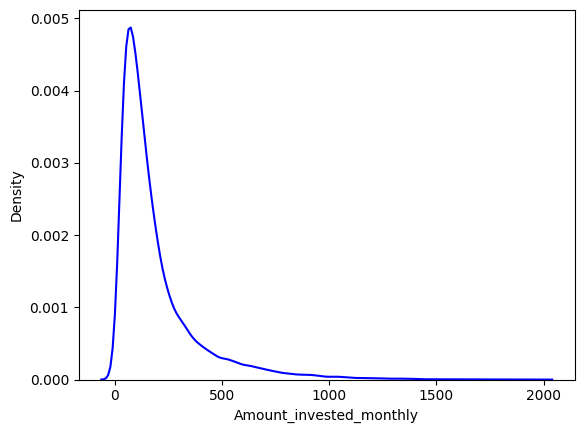

In [135]:
sns.distplot(credit_card.Amount_invested_monthly , hist= False , color= "blue")
plt.show()

In [136]:
fill_nan_with_median(credit_card , "Amount_invested_monthly" , "Customer_ID")

ID Customer_ID     Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh  23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh  23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  23.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh  23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh  23.0  821-00-0265   
...        ...         ...       ...            ...   ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks  25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks  25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks  25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks  25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks  25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12            1824.843333                  3   
2      Scientist       19114.12            1824.843333                  3   
3      Scientist       19114.12            1824.843333                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...        Good            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...        Good            502.38                 34.663572   
99996  ...        Good            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

      Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0              22.083333                     No            49.574949   
1                    NaN                     No            49.574949   
2              22.250000                     No            49.574949   
3              22.333333                     No            49.574949   
4              22.416667                     No            49.574949   
...                  ...                    ...                  ...   
99995          31.500000                     No            35.104023   
99996          31.583333                     No            35.104023   
99997          31.666667                     No            35.104023   
99998          31.750000                     No            35.104023   
99999          31.833333                     No            35.104023   

       Amount_invested_monthly                 Payment_Behaviour  \
0                    80.415295   High_spent_Small_value_payments   
1                   118.280222    Low_spent_Large_value_payments   
2                    81.699521   Low_spent_Medium_value_payments   
3                   199.458074    Low_spent_Small_value_payments   
4                    41.420153  High_spent_Medium_value_payments   
...                        ...                               ...   
99995           

In [137]:
credit_card.Amount_invested_monthly.isna().sum()

0

<span style = font-style:bold;color:blue>**`Monthly_Balance`**<span>: We are filling the missing values with the median grouped by customer_id. 
here,  we are not using the mean since we can see there is skewness in the data.

In [138]:
credit_card.Monthly_Balance.isna().sum()

1099

In [139]:
credit_card.Monthly_Balance.skew()

1.5875807512049687

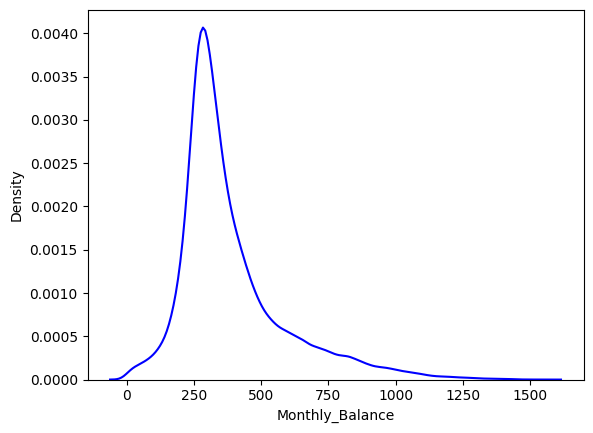

In [140]:
sns.distplot(credit_card.Monthly_Balance , hist= False , color= "blue")
plt.show()

In [141]:
fill_nan_with_median(credit_card , "Monthly_Balance" , "Customer_ID")

ID Customer_ID     Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh  23.0  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh  23.0  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  23.0  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh  23.0  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh  23.0  821-00-0265   
...        ...         ...       ...            ...   ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks  25.0  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks  25.0  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks  25.0  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks  25.0  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks  25.0  078-73-5990   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12            1824.843333                  3   
2      Scientist       19114.12            1824.843333                  3   
3      Scientist       19114.12            1824.843333                  3   
4      Scientist       19114.12            1824.843333                  3   
...          ...            ...                    ...                ...   
99995   Mechanic       39628.99            3359.415833                  4   
99996   Mechanic       39628.99            3359.415833                  4   
99997   Mechanic       39628.99            3359.415833                  4   
99998   Mechanic       39628.99            3359.415833                  4   
99999   Mechanic       39628.99            3359.415833                  4   

       ...  Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
0      ...        Good            809.98                 26.822620   
1      ...        Good            809.98                 31.944960   
2      ...        Good            809.98                 28.609352   
3      ...        Good            809.98                 31.377862   
4      ...        Good            809.98                 24.797347   
...    ...         ...               ...                       ...   
99995  ...        Good            502.38                 34.663572   
99996  ...        Good            502.38                 40.565631   
99997  ...        Good            502.38                 41.255522   
99998  ...        Good            502.38                 33.638208   
99999  ...        Good            502.38                 34.192463   

      Credit_History_Age  Payment_of_Min_Amount  Total_EMI_per_month  \
0              22.083333                     No            49.574949   
1                    NaN                     No            49.574949   
2              22.250000                     No            49.574949   
3              22.333333                     No            49.574949   
4              22.416667                     No            49.574949   
...                  ...                    ...                  ...   
99995          31.500000                     No            35.104023   
99996          31.583333                     No            35.104023   
99997          31.666667                     No            35.104023   
99998          31.750000                     No            35.104023   
99999          31.833333                     No            35.104023   

       Amount_invested_monthly                 Payment_Behaviour  \
0                    80.415295   High_spent_Small_value_payments   
1                   118.280222    Low_spent_Large_value_payments   
2                    81.699521   Low_spent_Medium_value_payments   
3                   199.458074    Low_spent_Small_value_payments   
4                    41.420153  High_spent_Medium_value_payments   
...                        ...                               ...   
99995           

In [142]:
credit_card.Monthly_Balance.isna().sum()

0

<span style = font-style:bold;color:blue>**`credit history age`**<span>: there are missing values present; since we see see a pattern in the number of months increasing; we use interpolate function to interpret the pattern and fill in the missing values.

In [143]:
credit_card.Credit_History_Age.isna().sum()

7573

In [144]:
# Fill NaN values using linear interpolation
credit_card['Credit_History_Age'] = credit_card['Credit_History_Age'].interpolate()
# Identify the pattern
pattern = np.diff(credit_card['Credit_History_Age'])

print("Pattern:", pattern)

Pattern: [0.08333333 0.08333333 0.08333333 ... 0.08333333 0.08333333 0.08333333]


In [145]:
credit_card.Credit_History_Age.isna().sum()

0

In [146]:
credit_card.isna().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        8355
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                   0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance                0
Credit_Score                   0
dtype: int64

In [147]:
credit_card.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                         float64
SSN                          object
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                

#### <span style = font-style:bold;color:blue>we are dropping  `name`, `id` and  `ssn` columns because they have no dependency on the target variable.we are setting the column `Customer_ID` as index<span>

In [148]:
credit_card.drop(columns= ['ID' , 'Name' , 'SSN'] , inplace= True)

In [149]:
credit_card.set_index("Customer_ID" , inplace= True)

In [150]:
credit_card.head()

Month   Age Occupation  Annual_Income  Monthly_Inhand_Salary  \
Customer_ID                                                                    
CUS_0xd40     January  23.0  Scientist       19114.12            1824.843333   
CUS_0xd40    February  23.0  Scientist       19114.12            1824.843333   
CUS_0xd40       March  23.0  Scientist       19114.12            1824.843333   
CUS_0xd40       April  23.0  Scientist       19114.12            1824.843333   
CUS_0xd40         May  23.0  Scientist       19114.12            1824.843333   

             Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
Customer_ID                                                                   
CUS_0xd40                    3                4              3          4.0   
CUS_0xd40                    3                4              3          4.0   
CUS_0xd40                    3                4              3          4.0   
CUS_0xd40                    3                4              3          4.0   
CUS_0xd40                    3                4              3          4.0   

                                                  Type_of_Loan  ...  \
Customer_ID                                                     ...   
CUS_0xd40    Auto Loan, Credit-Builder Loan, Personal Loan,...  ...   
CUS_0xd40    Auto Loan, Credit-Builder Loan, Personal Loan,...  ...   
CUS_0xd40    Auto Loan, Credit-Builder Loan, Personal Loan,...  ...   
CUS_0xd40    Auto Loan, Credit-Builder Loan, Personal Loan,...  ...   
CUS_0xd40    Auto Loan, Credit-Builder Loan, Personal Loan,...  ...   

             Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
Customer_ID                                                           
CUS_0xd40          Good            809.98                 26.822620   
CUS_0xd40          Good            809.98                 31.944960   
CUS_0xd40          Good            809.98                 28.609352   
CUS_0xd40          Good            809.98                 31.377862   
CUS_0xd40          Good            809.98                 24.797347   

             Credit_History_Age Payment_of_Min_Amount  Total_EMI_per_month  \
Customer_ID                                                                  
CUS_0xd40             22.083333                    No            49.574949   
CUS_0xd40             22.166667                    No            49.574949   
CUS_0xd40             22.250000                    No            49.574949   
CUS_0xd40             22.333333                    No            49.574949   
CUS_0xd40             22.416667                    No            49.574949   

             Amount_invested_monthly                 Payment_Behaviour  \
Customer_ID                                                              
CUS_0xd40                  80.415295   High_spent_Small_value_payments   
CUS_0xd40                 118.280222    Low_spent_Large_value_payments   
CUS_0xd40                  81.699521   Low_spent_Medium_value_payments   
CUS_0xd40                 199.458074    Low_spent_Small_value_payments   
CUS_0xd40                  41.420153  High_spent_Medium_value_payments   

            Monthly_Balance  Credit_Score  
Customer_ID                                
CUS_0xd40        312.494089          Good  
CUS_0xd40        284.629163          Good  
CUS_0xd40        331.209863          Good  
CUS_0xd40        223.451310          Good  
CUS_0xd40        341.489231          Good  

[5 rows x 24 columns]

<a id = "v"></a>
# <span style = "font-style:italic;color:skyblue"> VISUALIZATION <span>

<a id = "uv"></a>
## <span style = "font-style:italic;color:black"> UNIVARIATE <span>

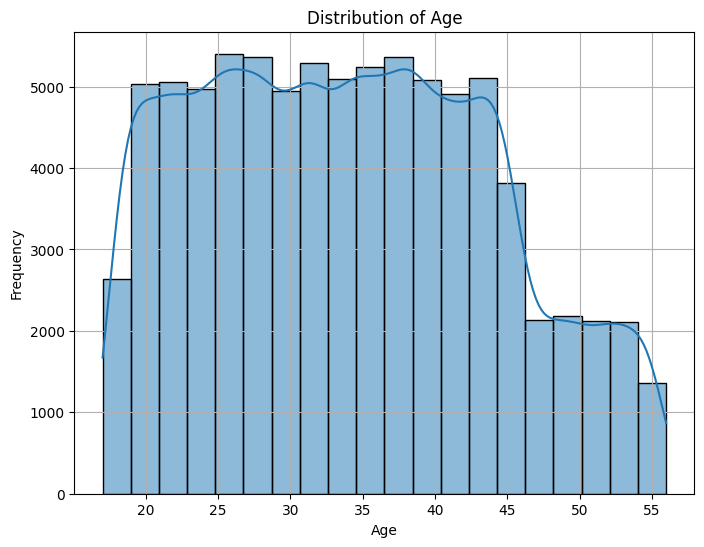

In [151]:
# Histogram for Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=credit_card, x='Age', bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('Distribution of Age.png')
plt.show()

#### <span style = font-style:bold;color:blue>we can see that there are **`more number of users`** using credit cards between the **`age 25 and 38`**. we see decline in the usage of credit card henceforth. here we have taken into consideration the age group between 18 and 60.<span>

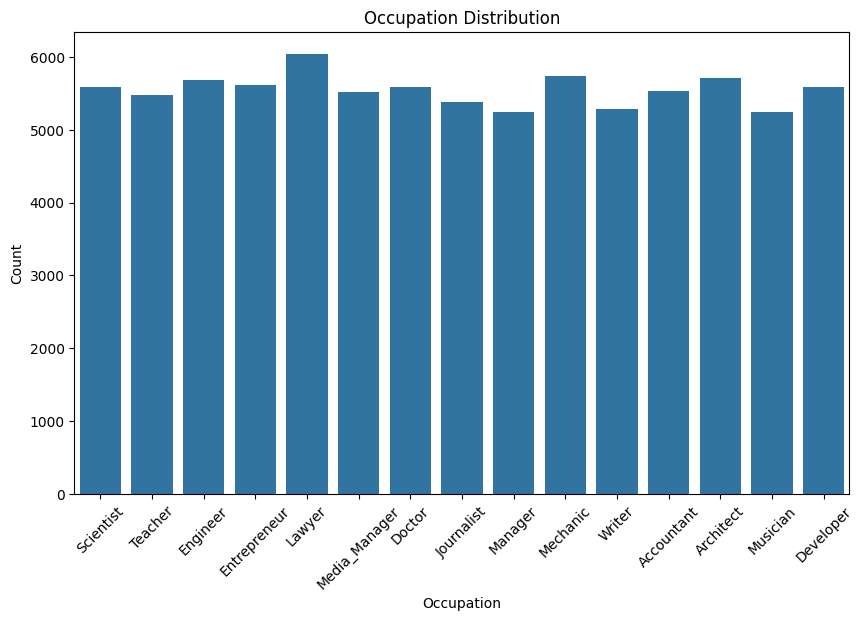

In [152]:
# Bar plot for Occupation
plt.figure(figsize=(10, 6))
sns.countplot(data=credit_card, x='Occupation')
plt.title('Occupation Distribution')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.savefig('Occupation Distribution.png')
plt.show()

#### <span style = font-style:bold;color:blue>Here we can see that the **`most usage`** of credit cards are by lawyers. also all profession have an average of 5000 number of people using credit cards.<span>

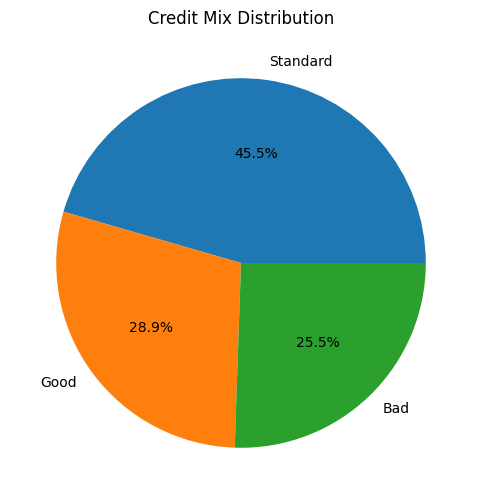

In [153]:
# Pie chart for Credit Mix
plt.figure(figsize=(8, 6))
credit_card['Credit_Mix'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Credit Mix Distribution')
plt.ylabel('')
plt.savefig('Credit Mix Distribution.png')
plt.show()

#### <span style = font-style:bold;color:blue>here we can see that there are 45.5%, 28.9% and 25.5% of people having standard, good and bad credit scores respectively.<br>and infer that **`more number of the people fall under standard`** category.<br>hence we can say they have better credit usage<span>

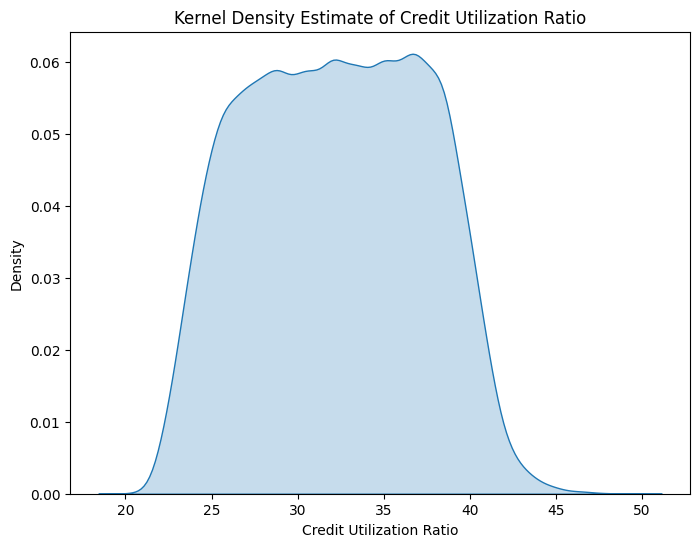

In [154]:
# Kernel Density Estimate (KDE) plot for Credit Utilization Ratio
plt.figure(figsize=(8, 6))
sns.kdeplot(data=credit_card['Credit_Utilization_Ratio'], shade=True)
plt.title('Kernel Density Estimate of Credit Utilization Ratio')
plt.xlabel('Credit Utilization Ratio')
plt.ylabel('Density')
plt.savefig('Kernel Density Estimate of Credit Utilization Ratio.png')
plt.show()


#### <span style = font-style:bold;color:blue>we can see that the credit utilization ratio on an average is at 25% to 40%<span>

<a id = "biv"></a>
## <span style = "font-style:italic;color:black"> BIVARIATE <span>

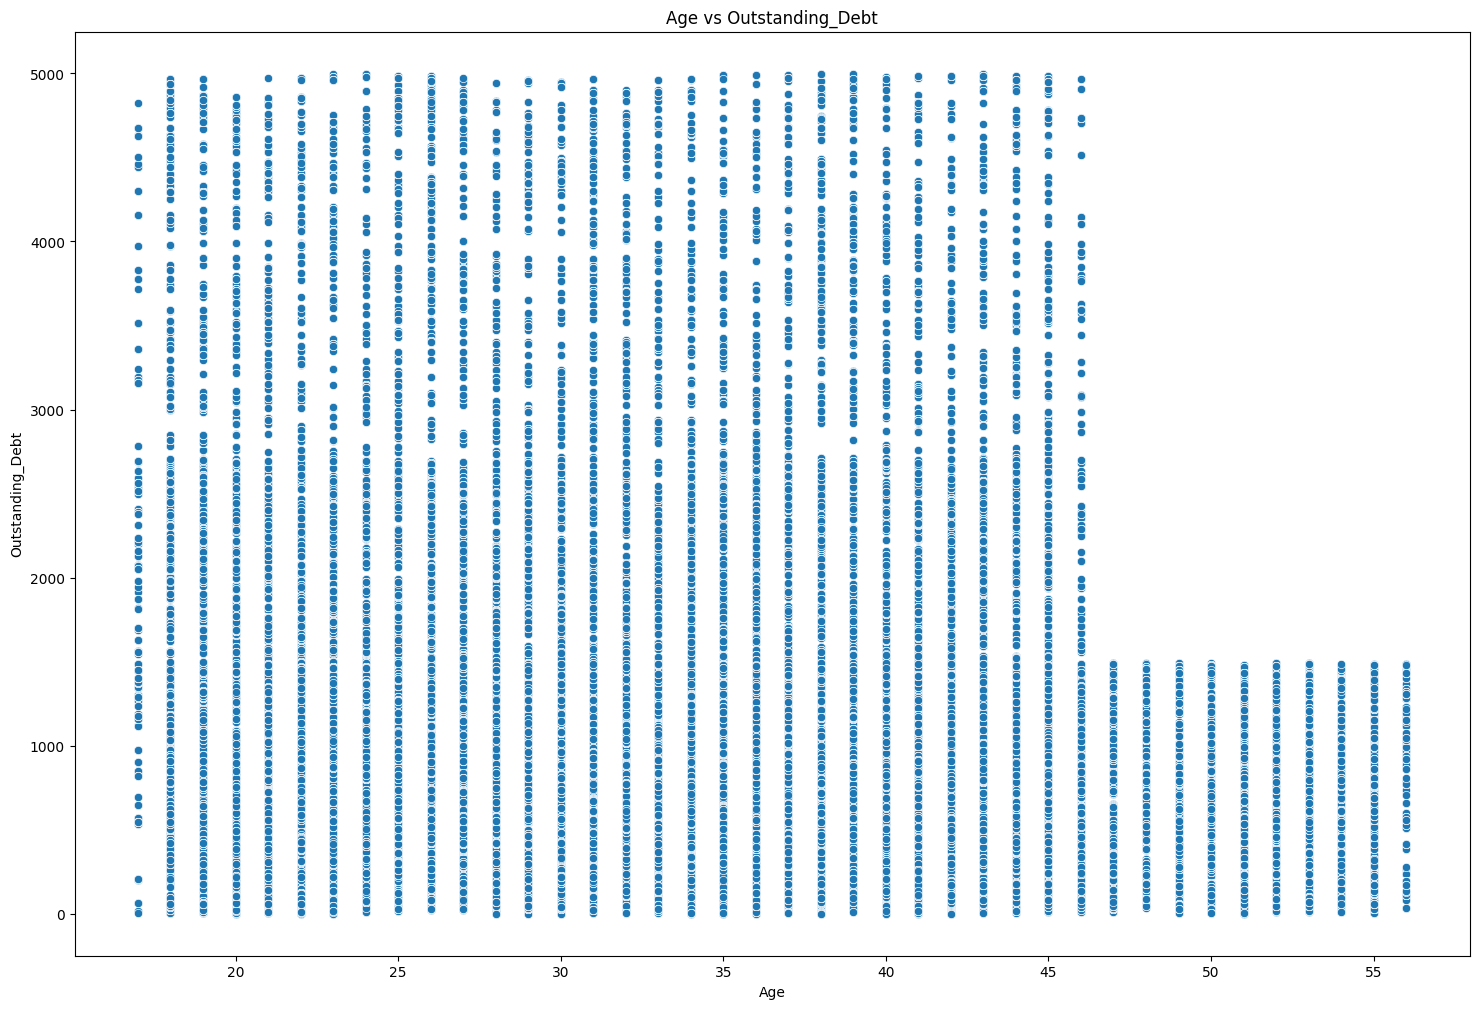

In [155]:
# Scatter plot for Age vs Monthly Inhand Salary
plt.figure(figsize=(18, 12))
sns.scatterplot(data=credit_card, x='Age', y='Outstanding_Debt')
plt.title('Age vs Outstanding_Debt')
plt.xlabel('Age')
plt.ylabel('Outstanding_Debt')
plt.savefig('Age vs Outstanding_Debt.png')
plt.show()

#### <span style = font-style:bold;color:blue>here we can infer that people **`below the age group of 42`** has an average outstanding debt of **`5000 dollars`**. after 42 the the outstanding debt of people have significantly reduced.<span>

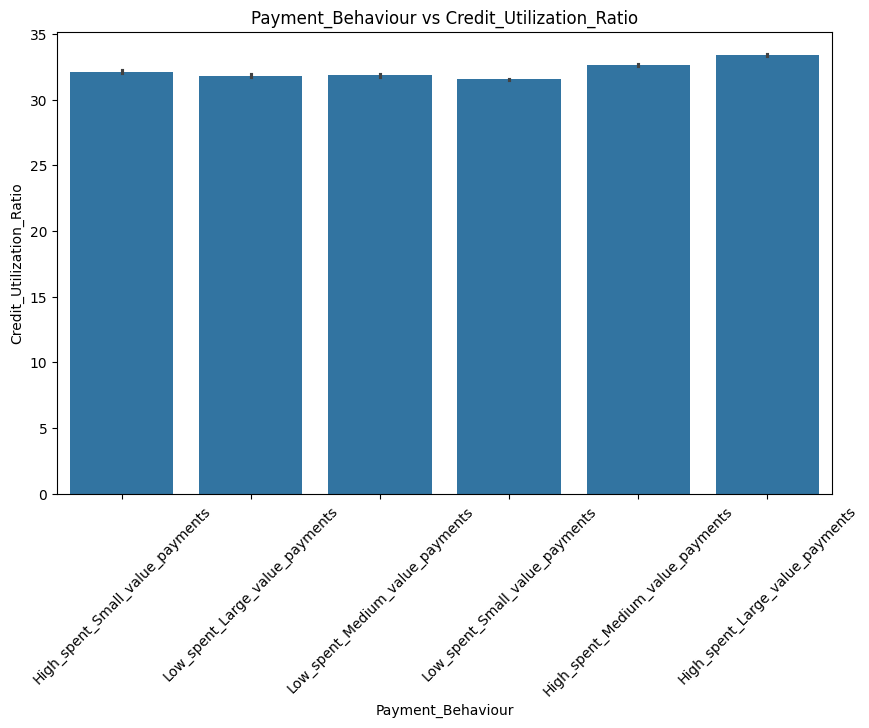

In [156]:
# Bar plot for Occupation vs Monthly Inhand Salary, grouped by Type of Loan
plt.figure(figsize=(10 , 6))
sns.barplot(data=credit_card, x='Payment_Behaviour', y='Credit_Utilization_Ratio')
plt.title('Payment_Behaviour vs Credit_Utilization_Ratio')
plt.xlabel('Payment_Behaviour')
plt.ylabel('Credit_Utilization_Ratio')
plt.xticks(rotation=45)
plt.savefig('Payment_Behaviour vs Credit_Utilization_Ratio.png')
plt.show()

#### <span style = font-style:bold;color:blue>here we can say that the group of people having the payment behavior as **`high_spent_large_value_payments`** have high credit utilization ratio of almost 34%.<span>

<a id = "muiv"></a>
## <span style = "font-style:italic;color:black"> MULTI VARIATE <span>

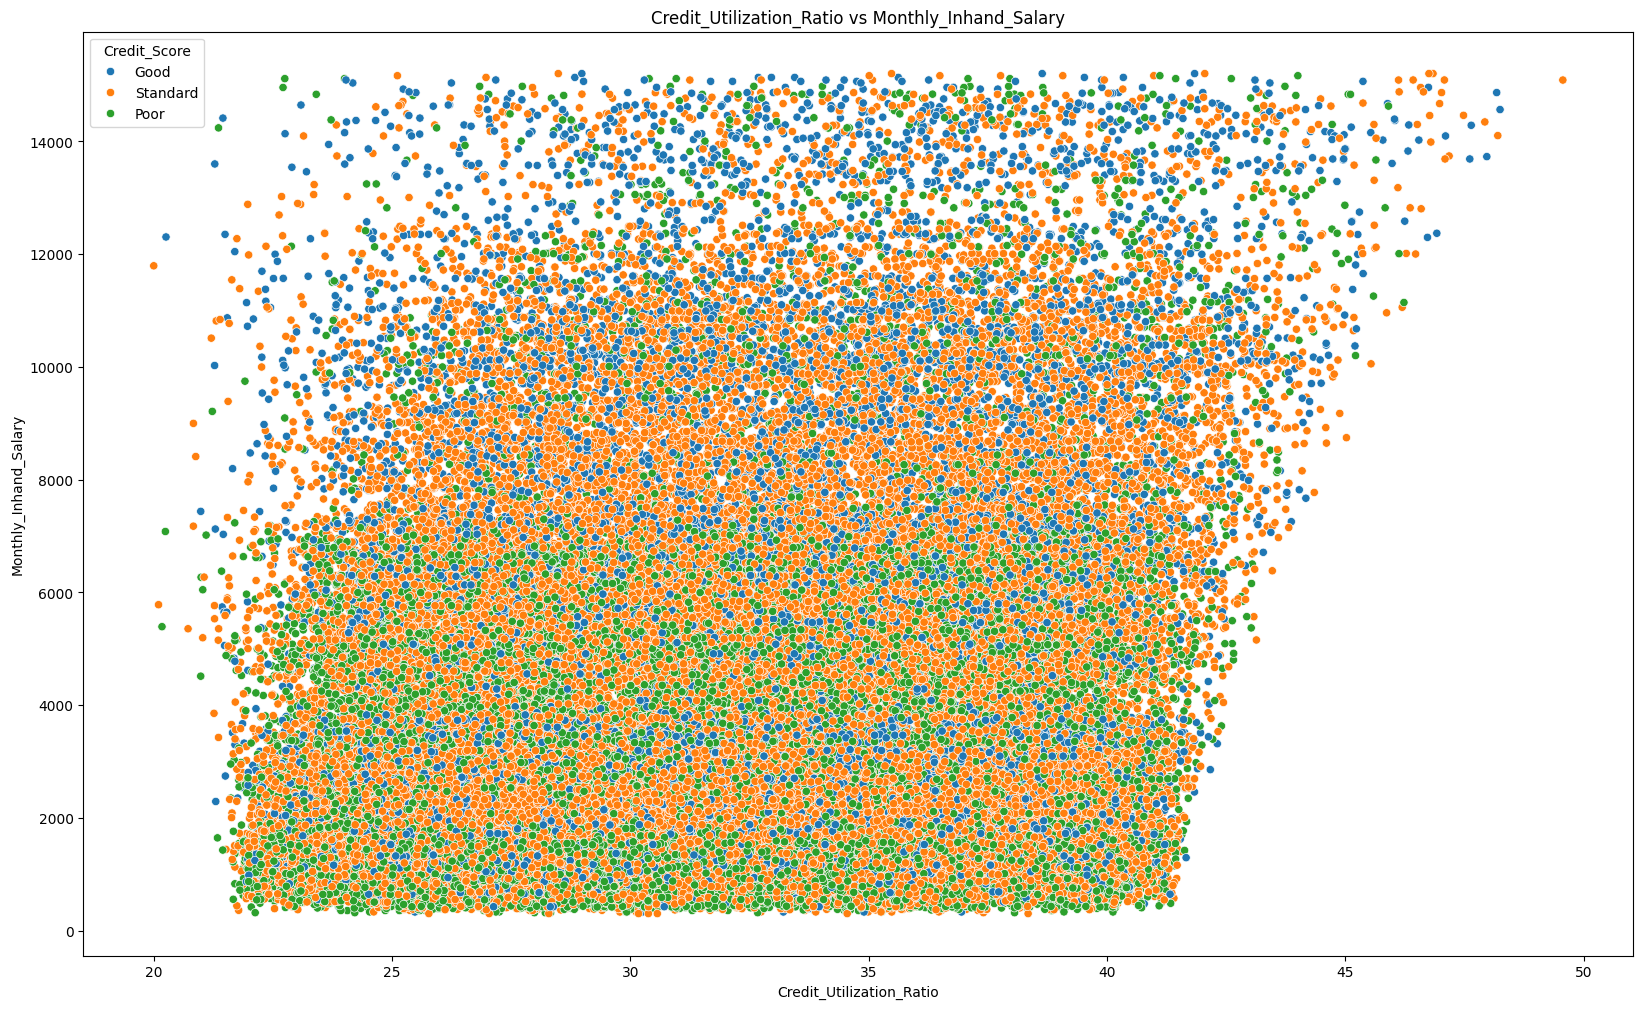

In [157]:
# Scatter plot for Age vs Monthly Inhand Salary
plt.figure(figsize=(20, 12))
sns.scatterplot(data=credit_card, x='Credit_Utilization_Ratio', y='Monthly_Inhand_Salary' , hue = 'Credit_Score')
plt.title('Credit_Utilization_Ratio vs Monthly_Inhand_Salary')
plt.xlabel('Credit_Utilization_Ratio')
plt.ylabel('Monthly_Inhand_Salary')
plt.savefig('Credit_Utilization_Ratio vs Monthly_Inhand_Salary.png')
plt.show()

#### <span style = font-style:bold;color:blue>here we can say that most of the people with **`Poor credit score lie below`** the salary range of 7000 USD and have the credit utilization ratio evenly spread between 22% to 41%.<span>

#### <span style = font-style:bold;color:blue>however we can also see that there is a **`person who is earning more than 14000 dollars`** and also has maximum utilization ratio of almost  49% and still have a standard credit score.<span>

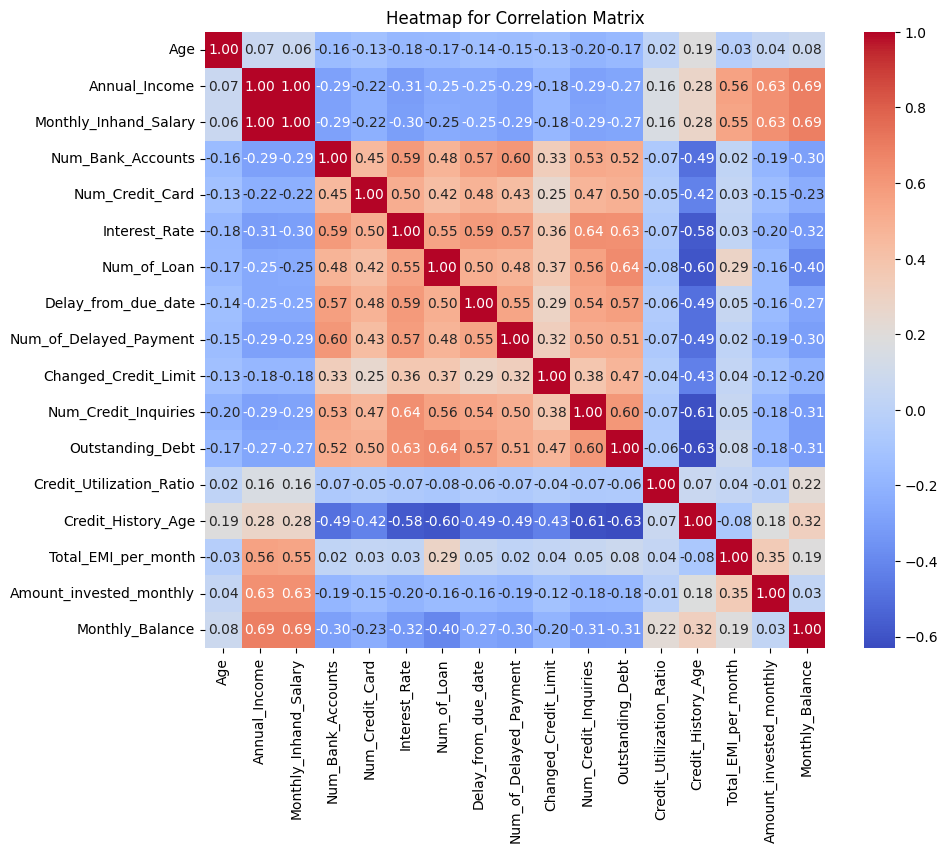

In [158]:
# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(credit_card.corr(numeric_only= True), cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Heatmap for Correlation Matrix')
plt.savefig('Heatmap for Correlation Matrix.png')
plt.show()

* delay from due date and interest rate has 0.59
* interest rate and number on credit inquiries 0.64
* interest rate and outstanding debt 0.63
* no of delayed payments and interest rate has 0.57
* outstanding debt and no of credit enquires 0.60
* no of loans and no of credit enquiries 0.56
* Monthly balance and annual income 0.69
* Amount invested monthly and monthly inhand salary 0.63

#### <span style = font-style:bold;color:blue>From the heatmap , we can see the above columns have the high correlation as mentioned above<span>

<a id = "ot"></a>
# <span style = "font-style:italic;color:skyblue"> OUTLIER TREATMENT <span>

In [159]:
credit_card.shape

(83232, 24)

In [160]:
# Remove outliers
Q1 = credit_card.select_dtypes(np.number).quantile(0.25)
Q3 = credit_card.select_dtypes(np.number).quantile(0.75)
IQR = Q3 - Q1

In [161]:
credit_card[~((credit_card.select_dtypes(np.number) < (Q1 - 1.5 * IQR)) | (credit_card.select_dtypes(np.number) > (Q3 + 1.5 * IQR))).any(axis=1)]

Month   Age Occupation  Annual_Income  Monthly_Inhand_Salary  \
Customer_ID                                                                    
CUS_0xd40     January  23.0  Scientist       19114.12            1824.843333   
CUS_0xd40    February  23.0  Scientist       19114.12            1824.843333   
CUS_0xd40       March  23.0  Scientist       19114.12            1824.843333   
CUS_0xd40       April  23.0  Scientist       19114.12            1824.843333   
CUS_0xd40         May  23.0  Scientist       19114.12            1824.843333   
...               ...   ...        ...            ...                    ...   
CUS_0x942c      April  25.0   Mechanic       39628.99            3359.415833   
CUS_0x942c        May  25.0   Mechanic       39628.99            3359.415833   
CUS_0x942c       June  25.0   Mechanic       39628.99            3359.415833   
CUS_0x942c       July  25.0   Mechanic       39628.99            3359.415833   
CUS_0x942c     August  25.0   Mechanic       39628.99            3359.415833   

             Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
Customer_ID                                                                   
CUS_0xd40                    3                4              3          4.0   
CUS_0xd40                    3                4              3          4.0   
CUS_0xd40                    3                4              3          4.0   
CUS_0xd40                    3                4              3          4.0   
CUS_0xd40                    3                4              3          4.0   
...                        ...              ...            ...          ...   
CUS_0x942c                   4                6              7          2.0   
CUS_0x942c                   4                6              7          2.0   
CUS_0x942c                   4                6              7          2.0   
CUS_0x942c                   4                6              7          2.0   
CUS_0x942c                   4                6              7          2.0   

                                                  Type_of_Loan  ...  \
Customer_ID                                                     ...   
CUS_0xd40    Auto Loan, Credit-Builder Loan, Personal Loan,...  ...   
CUS_0xd40    Auto Loan, Credit-Builder Loan, Personal Loan,...  ...   
CUS_0xd40    Auto Loan, Credit-Builder Loan, Personal Loan,...  ...   
CUS_0xd40    Auto Loan, Credit-Builder Loan, Personal Loan,...  ...   
CUS_0xd40    Auto Loan, Credit-Builder Loan, Personal Loan,...  ...   
...                                                        ...  ...   
CUS_0x942c                         Auto Loan, and Student Loan  ...   
CUS_0x942c                         Auto Loan, and Student Loan  ...   
CUS_0x942c                         Auto Loan, and Student Loan  ...   
CUS_0x942c                         Auto Loan, and Student Loan  ...   
CUS_0x942c                         Auto Loan, and Student Loan  ...   

             Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
Customer_ID                                                           
CUS_0xd40          Good            809.98                 26.822620   
CUS_0xd40          Good            809.98                 31.944960   
CUS_0xd40          Good            809.98                 28.609352   
CUS_0xd40          Good            809.98                 31.377862   
CUS_0xd40          Good            809.98                 24.797347   
...                 ...               ...                       ...   
CUS_0x942c         Good            502.38                 34.663572   
CUS_0x942c         Good            502.38                 40.565631   
CUS_0x942c         Good            502.38                 41.255522   
CUS_0x942c         Good            502.38                 33.638208   
CUS_0x942c         Good            502.38                 34.192463   

             Credit_History_Age Payment_of_Min_Amount  Total_EMI_per_month  \
Customer_ID          

In [162]:
#  we need to check the outliers in those numerical columns

In [163]:
credit_card.select_dtypes(np.number).columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance'],
      dtype='object')

#### <span style = font-style:bold;color:blue>In  **`Age`** , **`Monthly_Inhand_Salary`** , **`Num_of_Loan`** , **`Num_of_Delayed_Payment`** , **`Changed_Credit_Limit`** , **`Num_Credit_Inquiries`** ,<span>

 #### <span style = font-style:bold;color:blue>**`Annual_Income`** , **`Number of bank account`** , **`Number of credit card`** , **`Interest rate`** , **`Total EMI per month`** , **`Outstanding_Debt`** and <span>

 #### <span style = font-style:bold;color:blue>**`Credit_History_Age`** columns we dont need to do outliers Treatment since we already did the data cleaning process and change the mismatch <span>

#### <span style = font-style:bold;color:blue>values into null values then grouped by Customer ID and filled the values with mode.<span>

#### <span style = font-style:bold;color:blue>In **`Amount_invested_monthly`** and **`Monthly_Balance`**columns we dont need to do outliers Treatment since we already did the data cleaning process and change the mismatch values then grouped by Customer ID and filled the values with `median`.<span>

#### <span style = font-style:bold;color:blue>In **`Credit_Utilization_Ratio`** column we dont need to do outliers Treatment since we can see only few outliers and those are not mismatch values so we can proceed with the column<span>

In [164]:
credit_card.Credit_Utilization_Ratio.describe()

count    83232.000000
mean        32.190629
std          5.081361
min         20.000000
25%         27.982419
50%         32.217040
75%         36.400121
max         49.564519
Name: Credit_Utilization_Ratio, dtype: float64

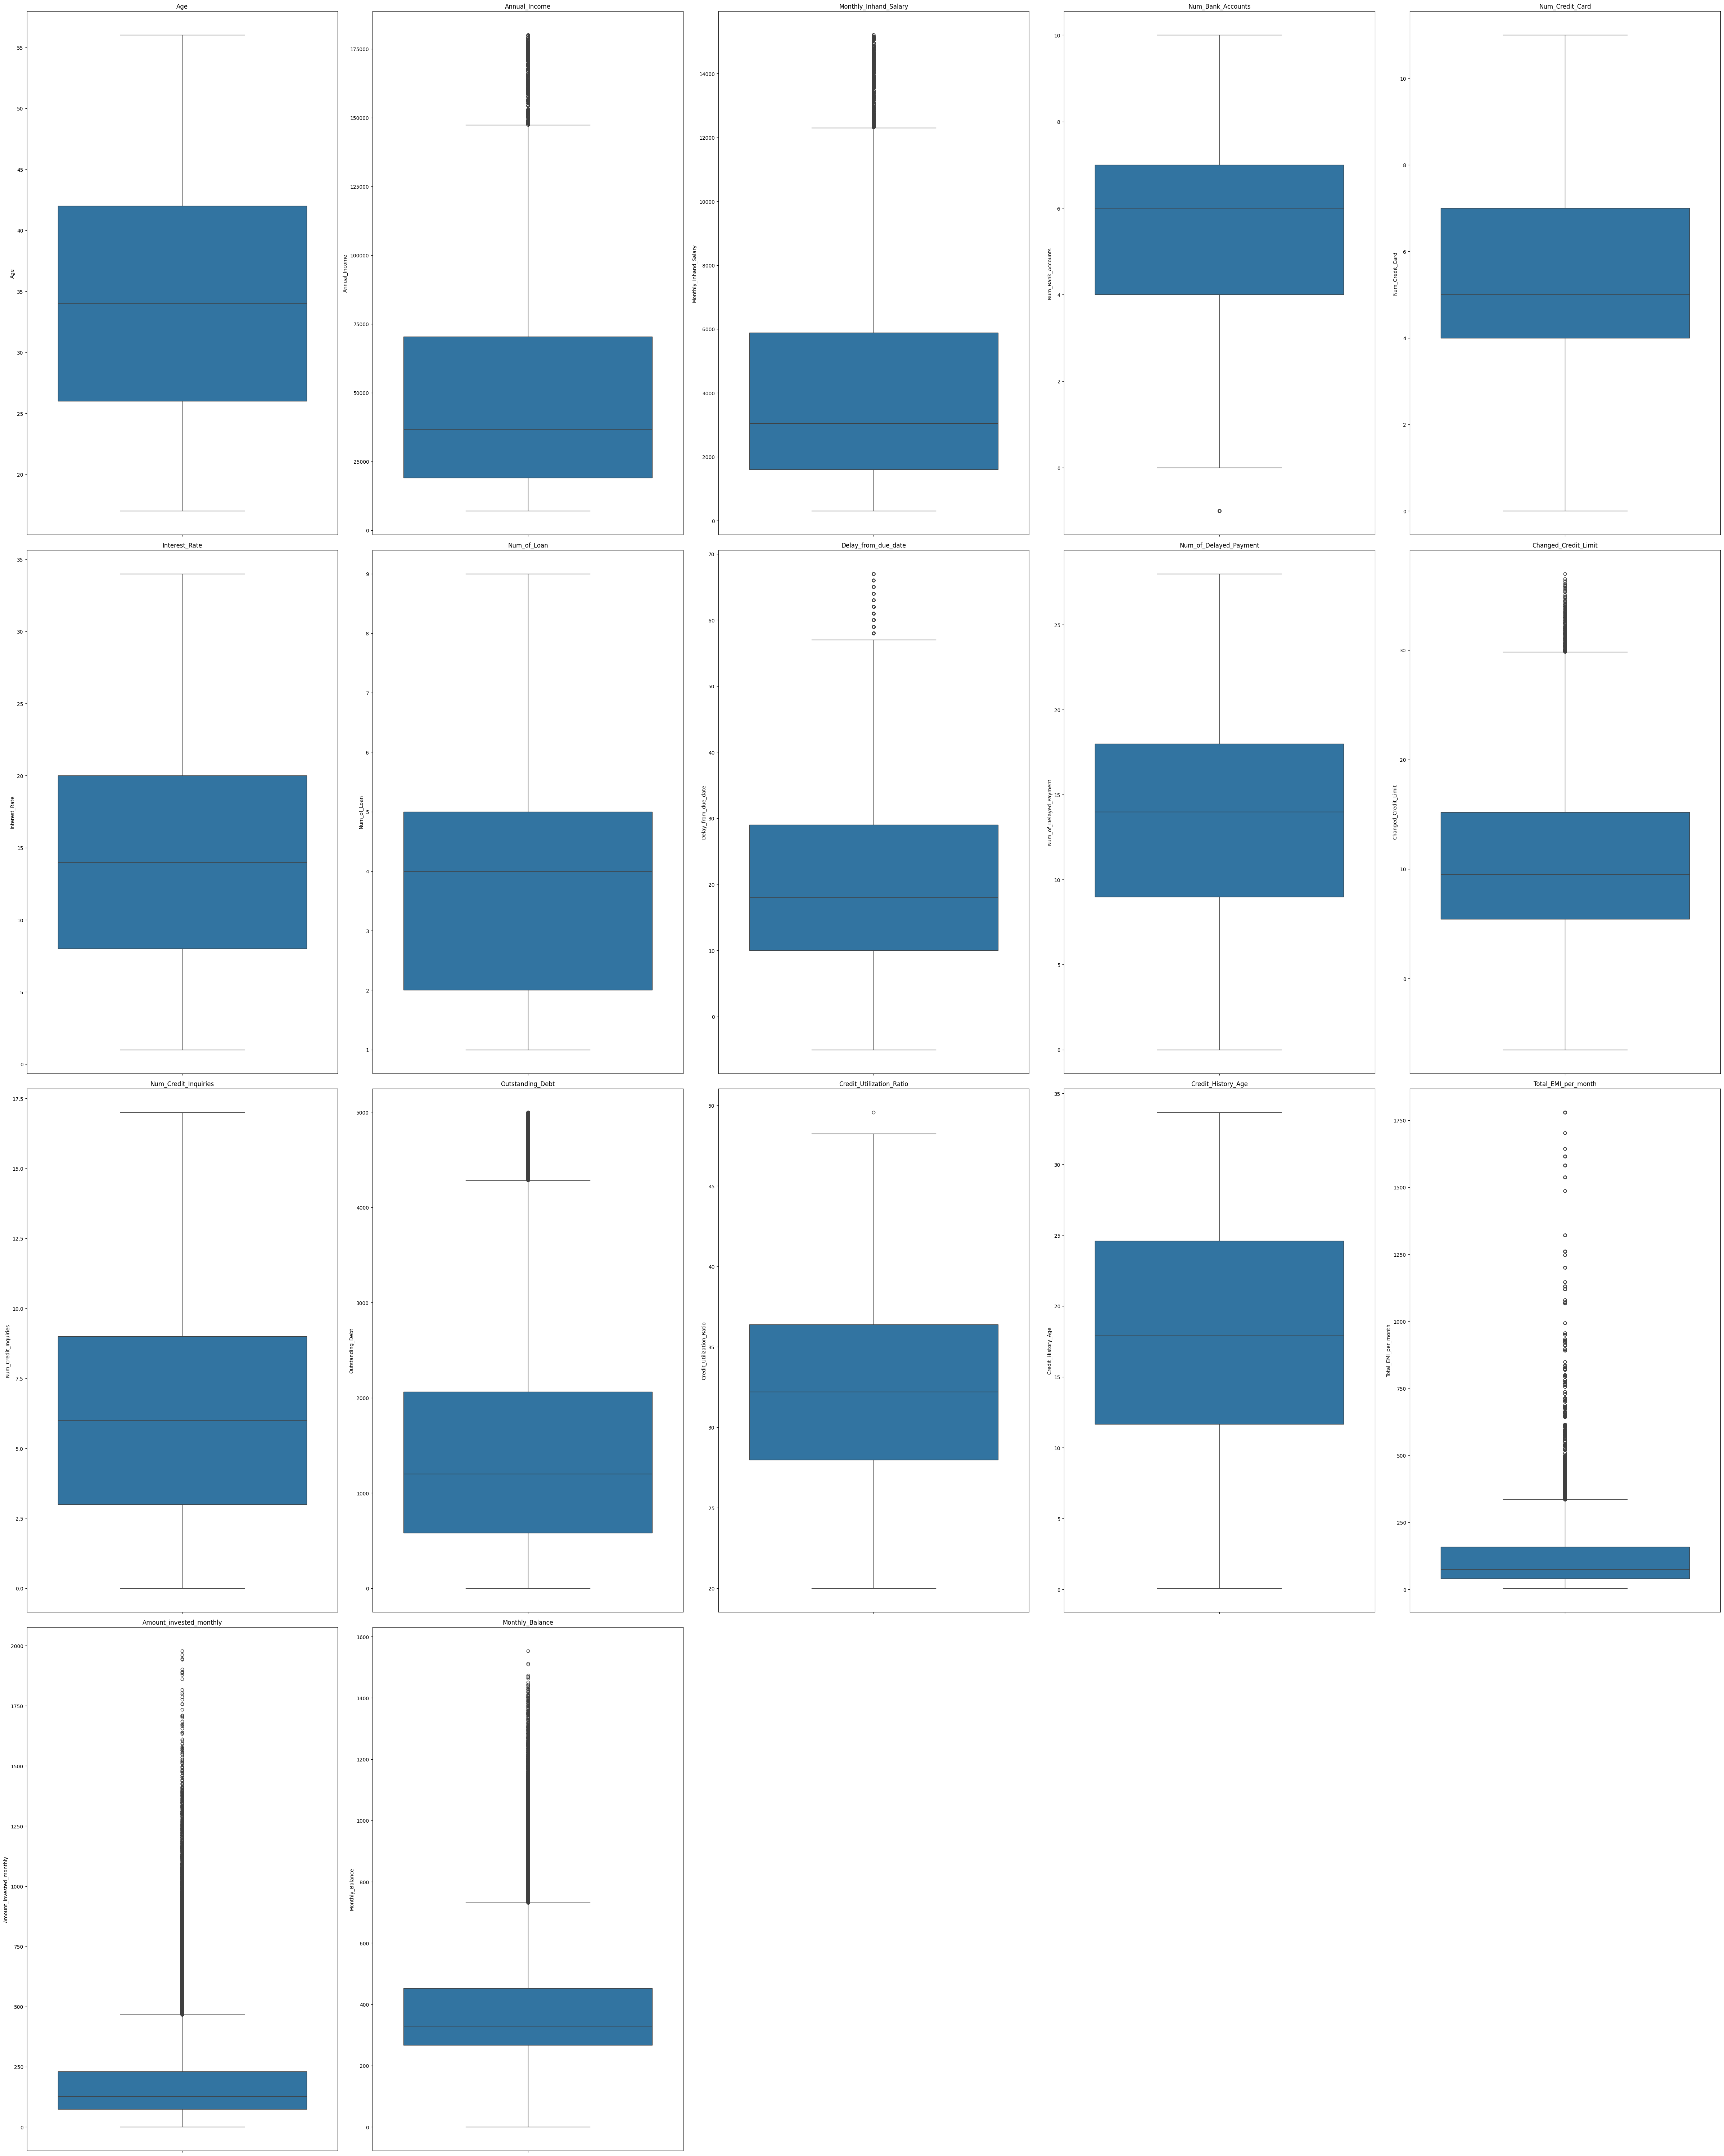

In [165]:
# box plot for all numberical columns for Visualize the outliers
plt.figure(figsize= [48,60])
t = 1
for i in credit_card.select_dtypes(np.number).columns:
    plt.subplot(4 , 5,t)
    sns.boxplot(credit_card[i])
    plt.title(i)
    t = t + 1
plt.tight_layout()
plt.savefig('box plot for numerical variables.png')
plt.show()

<a id = "sa"></a>
# <span style = "font-style:italic;color:skyblue"> STATISTICAL ANALYSIS : <span>

<a id = "de"></a>
## <span style = "font-style:italic;color:black"> DESCRIBE <span>

<span style = font-style:bold;color:blue>**`describe`**<span>:  we can gather the five point summary of all numeric columns.

In [166]:
credit_card.describe()

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count  83232.000000   83232.000000           83232.000000       83232.000000   
mean      34.044502   49632.415358            4127.618425           5.449154   
std        9.982938   37923.586578            3158.158922           2.598371   
min       17.000000    7006.035000             303.645417          -1.000000   
25%       26.000000   19071.272500            1599.830000           4.000000   
50%       34.000000   36570.925000            3047.121667           6.000000   
75%       42.000000   70416.020000            5884.426667           7.000000   
max       56.000000  179987.280000           15204.633330          10.000000   

       Num_Credit_Card  Interest_Rate   Num_of_Loan  Delay_from_due_date  \
count     83232.000000   83232.000000  83232.000000         83232.000000   
mean          5.589004      14.898693      3.909650            21.562584   
std           2.079613       8.830885      2.206551            15.117314   
min           0.000000       1.000000      1.000000            -5.000000   
25%           4.000000       8.000000      2.000000            10.000000   
50%           5.000000      14.000000      4.000000            18.000000   
75%           7.000000      20.000000      5.000000            29.000000   
max          11.000000      34.000000      9.000000            67.000000   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
count            83232.000000          83232.000000          83232.000000   
mean                13.528379             10.567041              5.923287   
std                  6.256076              6.888817              3.893238   
min                  0.000000             -6.490000              0.000000   
25%                  9.000000              5.420000              3.000000   
50%                 14.000000              9.520000              6.000000   
75%                 18.000000             15.190000              9.000000   
max                 28.000000             36.970000             17.000000   

       Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
count      83232.000000              83232.000000        83232.000000   
mean        1472.830794                 32.190629           18.069397   
std         1181.038111                  5.081361            8.288886   
min            0.230000                 20.000000            0.083333   
25%          582.257500                 27.982419           11.666667   
50%         1202.415000                 32.217040           17.916667   
75%         2063.582500                 36.400121           24.583333   
max         4998.070000                 49.564519           33.666667   

       Total_EMI_per_month  Amount_invested_monthly  Monthly_Balance  
count         83232.000000             83232.000000     83232.000000  
mean            116.072335               191.003290       388.270455  
std             120.507537               193.078372       200.238828  
min               4.462837                 0.000000         0.007760  
25%              40.150347                72.719614       266.251575  
50%              75.463962               127.475601       328.635400  
75%             158.493835               230.311263       452.601054  
max            1779.103254              1977.326102      1552.946094

<span style = font-style:bold;color:blue>**`describe(include = 'object')`**<span> : we can gather the five point summary of all categorical columns

In [167]:
credit_card.describe(include= 'object')

Month Occupation   Type_of_Loan Credit_Mix Payment_of_Min_Amount  \
count     83232      83232          83232      83232                 83232   
unique        8         15           5782          3                     3   
top     January     Lawyer  Not Specified   Standard                   Yes   
freq      10404       6040           1392      37888                 44803   

                     Payment_Behaviour Credit_Score  
count                            83232        83232  
unique                               6            3  
top     Low_spent_Small_value_payments     Standard  
freq                             23461        43826

<a id = "sk"></a>
## <span style = "font-style:italic;color:black"> SKEWNESS <span>

In [168]:
credit_card.skew(numeric_only = True)

Age                         0.218938
Annual_Income               1.161364
Monthly_Inhand_Salary       1.159198
Num_Bank_Accounts          -0.212570
Num_Credit_Card             0.218855
Interest_Rate               0.436352
Num_of_Loan                 0.612450
Delay_from_due_date         0.925397
Num_of_Delayed_Payment     -0.214582
Changed_Credit_Limit        0.631964
Num_Credit_Inquiries        0.355136
Outstanding_Debt            1.136489
Credit_Utilization_Ratio    0.015032
Credit_History_Age          0.000310
Total_EMI_per_month         3.648857
Amount_invested_monthly     2.617989
Monthly_Balance             1.574175
dtype: float64

<span style = font-style:bold;color:blue>we can see that the **`skewness`** of `total EMI per month` is greater and we can infer that it is positively skewed<span>

<a id = "ku"></a>
## <span style = "font-style:italic;color:black"> KURTOSIS <span>

In [169]:
credit_card.kurtosis(numeric_only = True)

Age                         -0.896842
Annual_Income                0.723487
Monthly_Inhand_Salary        0.731848
Num_Bank_Accounts           -0.681799
Num_Credit_Card             -0.375751
Interest_Rate               -0.766961
Num_of_Loan                 -0.505801
Delay_from_due_date          0.201102
Num_of_Delayed_Payment      -0.662796
Changed_Credit_Limit         0.049595
Num_Credit_Inquiries        -0.675717
Outstanding_Debt             0.667464
Credit_Utilization_Ratio    -0.973051
Credit_History_Age          -0.895320
Total_EMI_per_month         27.199308
Amount_invested_monthly      9.326040
Monthly_Balance              3.004330
dtype: float64

<span style = font-style:bold;color:blue>we can see that the **`Kurtosis`** of `total EMI per month` looks high peakness and we can infer that it is positively skewed

<a id = "hyp"></a>
## <span style = "font-style:italic;color:black"> HYPOTHESIS TESTING <span>

In [170]:
credit_card.dtypes

Month                        object
Age                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                 object
dtype: object

In [171]:
# Normality testing
shapiro_results = {}

# Loop through columns and perform Shapiro test for float and integer columns
for col in credit_card.columns:
    if credit_card[col].dtype in ['float64', 'int64']:
        _, p_value = shapiro(credit_card[col])
        shapiro_results[col] = p_value

# Set significance level
alpha = 0.05

# Print the Shapiro test results and make inferences
for col, p_value in shapiro_results.items():
    if p_value < alpha:
        print(f"Shapiro test p-value for column '{col}' is {p_value}, which is less than {alpha}, reject the null hypothesis.")
    else:
        print(f"Shapiro test p-value for column '{col}' is {p_value}, which is greater than or equal to {alpha}, fail to reject the null hypothesis.")

Shapiro test p-value for column 'Age' is 0.0, which is less than 0.05, reject the null hypothesis.
Shapiro test p-value for column 'Annual_Income' is 0.0, which is less than 0.05, reject the null hypothesis.
Shapiro test p-value for column 'Monthly_Inhand_Salary' is 0.0, which is less than 0.05, reject the null hypothesis.
Shapiro test p-value for column 'Num_Bank_Accounts' is 0.0, which is less than 0.05, reject the null hypothesis.
Shapiro test p-value for column 'Num_Credit_Card' is 0.0, which is less than 0.05, reject the null hypothesis.
Shapiro test p-value for column 'Interest_Rate' is 0.0, which is less than 0.05, reject the null hypothesis.
Shapiro test p-value for column 'Num_of_Loan' is 0.0, which is less than 0.05, reject the null hypothesis.
Shapiro test p-value for column 'Delay_from_due_date' is 0.0, which is less than 0.05, reject the null hypothesis.
Shapiro test p-value for column 'Num_of_Delayed_Payment' is 0.0, which is less than 0.05, reject the null hypothesis.
Sh

In [172]:
# variables testing

In [173]:
numerical_data = credit_card.select_dtypes(include= np.number)

levene_results = {}

# Loop through columns and perform Levene test for float and integer columns
for col in numerical_data.columns:
    # Perform the Levene test
    statistic, p_value = levene(
        numerical_data[credit_card['Credit_Score'] == 'Good'][col],
        numerical_data[credit_card['Credit_Score'] == 'Standard'][col],
        numerical_data[credit_card['Credit_Score'] == 'Poor'][col]
    )
    
    levene_results[col] = p_value

# Set significance level
alpha = 0.05

# Print the Levene test results and make inferences
for col, p_value in levene_results.items():
    if p_value < alpha:
        print(f"Levene test p-value for column '{col}' is {p_value}, which is less than {alpha}, reject the null hypothesis.")
    else:
        print(f"Levene test p-value for column '{col}' is {p_value}, which is greater than or equal to {alpha}, fail to reject the null hypothesis.")

Levene test p-value for column 'Age' is 1.3207704979550241e-220, which is less than 0.05, reject the null hypothesis.
Levene test p-value for column 'Annual_Income' is 0.0, which is less than 0.05, reject the null hypothesis.
Levene test p-value for column 'Monthly_Inhand_Salary' is 0.0, which is less than 0.05, reject the null hypothesis.
Levene test p-value for column 'Num_Bank_Accounts' is 8.449246192103242e-27, which is less than 0.05, reject the null hypothesis.
Levene test p-value for column 'Num_Credit_Card' is 1.480329519617793e-66, which is less than 0.05, reject the null hypothesis.
Levene test p-value for column 'Interest_Rate' is 0.0, which is less than 0.05, reject the null hypothesis.
Levene test p-value for column 'Num_of_Loan' is 0.0, which is less than 0.05, reject the null hypothesis.
Levene test p-value for column 'Delay_from_due_date' is 0.0, which is less than 0.05, reject the null hypothesis.
Levene test p-value for column 'Num_of_Delayed_Payment' is 1.14513695038

In [174]:
# Assuming 'credit_score' is your target variable and 'creditcard' is your DataFrame

# List of categorical columns
categorical_columns = credit_card.select_dtypes(exclude= np.number).columns

# Perform chi-square test for each categorical variable
chi2_results = {}

for col in categorical_columns:
    contingency_table = pd.crosstab(credit_card[col], credit_card['Credit_Score'])
    chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_results[col] = {'chi2_statistic': chi2_stat, 'p_value': p_value}

# Set significance level
alpha = 0.05

# Print chi-square test results and make inferences
for col, result in chi2_results.items():
    if result['p_value'] < alpha:
        print(f"Chi-square test p-value for column '{col}' is {result['p_value']}, which is less than {alpha}, reject the null hypothesis.")
    else:
        print(f"Chi-square test p-value for column '{col}' is {result['p_value']}, which is greater than or equal to {alpha}, fail to reject the null hypothesis.")

Chi-square test p-value for column 'Month' is 9.235004202548116e-25, which is less than 0.05, reject the null hypothesis.
Chi-square test p-value for column 'Occupation' is 3.2920325760557713e-19, which is less than 0.05, reject the null hypothesis.
Chi-square test p-value for column 'Type_of_Loan' is 0.0, which is less than 0.05, reject the null hypothesis.
Chi-square test p-value for column 'Credit_Mix' is 0.0, which is less than 0.05, reject the null hypothesis.
Chi-square test p-value for column 'Payment_of_Min_Amount' is 0.0, which is less than 0.05, reject the null hypothesis.
Chi-square test p-value for column 'Payment_Behaviour' is 1.4195267098226385e-272, which is less than 0.05, reject the null hypothesis.
Chi-square test p-value for column 'Credit_Score' is 0.0, which is less than 0.05, reject the null hypothesis.


In [175]:
# numerical Data
numerical_data = credit_card.select_dtypes(include= np.number)

# Define a dictionary to store the ANOVA results for each numerical column
anova_results = {}

# Perform ANOVA test for each numerical column
for col in numerical_data.columns:
    # Perform the ANOVA test
    statistic, p_value = f_oneway(
        numerical_data[credit_card['Credit_Score'] == 'Good'][col],
        numerical_data[credit_card['Credit_Score'] == 'Standard'][col],
        numerical_data[credit_card['Credit_Score'] == 'Poor'][col]
    )
    
    # Store the p-value in the dictionary
    anova_results[col] = p_value

# Set significance level
alpha = 0.05

# Print the ANOVA test results and make inferences
for col, p_value in anova_results.items():
    if p_value < alpha:
        print(f"ANOVA test p-value for column '{col}' is {p_value}, which is less than {alpha}, reject the null hypothesis.")
    else:
        print(f"ANOVA test p-value for column '{col}' is {p_value}, which is greater than or equal to {alpha}, fail to reject the null hypothesis.")

ANOVA test p-value for column 'Age' is 3.665e-320, which is less than 0.05, reject the null hypothesis.
ANOVA test p-value for column 'Annual_Income' is 0.0, which is less than 0.05, reject the null hypothesis.
ANOVA test p-value for column 'Monthly_Inhand_Salary' is 0.0, which is less than 0.05, reject the null hypothesis.
ANOVA test p-value for column 'Num_Bank_Accounts' is 0.0, which is less than 0.05, reject the null hypothesis.
ANOVA test p-value for column 'Num_Credit_Card' is 0.0, which is less than 0.05, reject the null hypothesis.
ANOVA test p-value for column 'Interest_Rate' is 0.0, which is less than 0.05, reject the null hypothesis.
ANOVA test p-value for column 'Num_of_Loan' is 0.0, which is less than 0.05, reject the null hypothesis.
ANOVA test p-value for column 'Delay_from_due_date' is 0.0, which is less than 0.05, reject the null hypothesis.
ANOVA test p-value for column 'Num_of_Delayed_Payment' is 0.0, which is less than 0.05, reject the null hypothesis.
ANOVA test p-

In [176]:
# Define your target variable
target_variable = "Credit_Score"

# Define a list to store the results
tukey_results = []

# Iterate over each numerical column
for col in numerical_data.columns:
    # Combine data and generate labels
    data = numerical_data[col]
    labels = credit_card[target_variable]
    
    # Perform Tukey's HSD test
    mc = MultiComparison(data, groups=labels)
    post_hoc = mc.tukeyhsd()
    
    # Store the results
    tukey_results.append((col, post_hoc))

# Print the summary of each Tukey's HSD test
for col, result in tukey_results:
    print(f"Tukey's HSD test results for column '{col}':")
    print(result.summary())
    print()

Tukey's HSD test results for column 'Age':
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1  group2  meandiff p-adj  lower   upper  reject
-----------------------------------------------------
  Good     Poor  -3.9663   0.0 -4.2097  -3.723   True
  Good Standard  -2.1941   0.0  -2.418 -1.9701   True
  Poor Standard   1.7723   0.0   1.589  1.9556   True
-----------------------------------------------------

Tukey's HSD test results for column 'Annual_Income':
      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1  group2    meandiff  p-adj    lower       upper    reject
----------------------------------------------------------------
  Good     Poor -25270.6203   0.0 -26180.3482 -24360.8924   True
  Good Standard -15073.6313   0.0 -15910.8753 -14236.3872   True
  Poor Standard  10196.9891   0.0   9511.7011   10882.277   True
----------------------------------------------------------------

Tukey's HSD test results for column 'Monthly_Inhand_Salary':
     Mul

#### <span style = font-style:bold;color:blue>All the statistical tests namely, **`shapiro`**, **`levene`**,**`ANOVA`**,**`chi_square`** are failing our assumption, so we can say that our independent variables are significant to our target variables.<span>

<a id = "mbd"></a>
# <span style = "font-style:italic;color:skyblue"> MODEL BUILDING : <span>

In [177]:
# Create an empty DataFrame to store F1 scores
f1_df = pd.DataFrame(columns=['Model', 'F1-score'])

<a id = "etv"></a>
## <span style = "font-style:italic;color:black"> ENCODING TARGET VARIABLE <span>

In [178]:
encoding_mapping = {"Good": 1, "Standard": 2, "Poor": 3}

# Replace the original values with the encoded values
credit_card['Credit_Score'] = credit_card['Credit_Score'].map(encoding_mapping)

# Print the encoded target variable
print("after Encoded target variable:")
credit_card.head()

after Encoded target variable:


Month   Age Occupation  Annual_Income  Monthly_Inhand_Salary  \
Customer_ID                                                                    
CUS_0xd40     January  23.0  Scientist       19114.12            1824.843333   
CUS_0xd40    February  23.0  Scientist       19114.12            1824.843333   
CUS_0xd40       March  23.0  Scientist       19114.12            1824.843333   
CUS_0xd40       April  23.0  Scientist       19114.12            1824.843333   
CUS_0xd40         May  23.0  Scientist       19114.12            1824.843333   

             Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
Customer_ID                                                                   
CUS_0xd40                    3                4              3          4.0   
CUS_0xd40                    3                4              3          4.0   
CUS_0xd40                    3                4              3          4.0   
CUS_0xd40                    3                4              3          4.0   
CUS_0xd40                    3                4              3          4.0   

                                                  Type_of_Loan  ...  \
Customer_ID                                                     ...   
CUS_0xd40    Auto Loan, Credit-Builder Loan, Personal Loan,...  ...   
CUS_0xd40    Auto Loan, Credit-Builder Loan, Personal Loan,...  ...   
CUS_0xd40    Auto Loan, Credit-Builder Loan, Personal Loan,...  ...   
CUS_0xd40    Auto Loan, Credit-Builder Loan, Personal Loan,...  ...   
CUS_0xd40    Auto Loan, Credit-Builder Loan, Personal Loan,...  ...   

             Credit_Mix  Outstanding_Debt  Credit_Utilization_Ratio  \
Customer_ID                                                           
CUS_0xd40          Good            809.98                 26.822620   
CUS_0xd40          Good            809.98                 31.944960   
CUS_0xd40          Good            809.98                 28.609352   
CUS_0xd40          Good            809.98                 31.377862   
CUS_0xd40          Good            809.98                 24.797347   

             Credit_History_Age Payment_of_Min_Amount  Total_EMI_per_month  \
Customer_ID                                                                  
CUS_0xd40             22.083333                    No            49.574949   
CUS_0xd40             22.166667                    No            49.574949   
CUS_0xd40             22.250000                    No            49.574949   
CUS_0xd40             22.333333                    No            49.574949   
CUS_0xd40             22.416667                    No            49.574949   

             Amount_invested_monthly                 Payment_Behaviour  \
Customer_ID                                                              
CUS_0xd40                  80.415295   High_spent_Small_value_payments   
CUS_0xd40                 118.280222    Low_spent_Large_value_payments   
CUS_0xd40                  81.699521   Low_spent_Medium_value_payments   
CUS_0xd40                 199.458074    Low_spent_Small_value_payments   
CUS_0xd40                  41.420153  High_spent_Medium_value_payments   

            Monthly_Balance  Credit_Score  
Customer_ID                                
CUS_0xd40        312.494089             1  
CUS_0xd40        284.629163             1  
CUS_0xd40        331.209863             1  
CUS_0xd40        223.451310             1  
CUS_0xd40        341.489231             1  

[5 rows x 24 columns]

<a id = "dcl"></a>
## <span style = "font-style:italic;color:black"> DROP UNNECESSARY COLUMNS <span>

In [179]:
credit_card.dtypes

Month                        object
Age                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                  int64
dtype: object

In [180]:
credit_card.drop(columns=['Month' , 'Occupation' , 'Type_of_Loan' , 'Credit_Mix'] , inplace = True)

In [181]:
credit_card.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

<a id = "ecc"></a>
## <span style = "font-style:italic;color:black"> ENCODING CATEGORICAL COLUMNS <span>

In [182]:
categorical_columns = credit_card.select_dtypes(exclude= np.number).columns

In [183]:
# Creating the categorical columns for encoding process
categorical_columns

Index(['Payment_of_Min_Amount', 'Payment_Behaviour'], dtype='object')

In [184]:
# Use one-hot encoding to encode categorical columns
encoded_data = pd.get_dummies(credit_card, columns=categorical_columns, drop_first=True , dtype= int)

# Define your features (X) and target variable (y)
X = encoded_data.drop(columns=['Credit_Score'])  # Assuming 'target_variable' is your target column
y = credit_card['Credit_Score']  # Assuming 'target_variable' is your target column

<a id = "bml"></a>
## <span style = "font-style:italic;color:black"> BASIC MODEL <span>

In [185]:
sc = StandardScaler()

scaled_data = sc.fit_transform(X)

scaled_data = pd.DataFrame(X , columns= X.columns)

scaled_data

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
Customer_ID                                                                  
CUS_0xd40    23.0       19114.12            1824.843333                  3   
CUS_0xd40    23.0       19114.12            1824.843333                  3   
CUS_0xd40    23.0       19114.12            1824.843333                  3   
CUS_0xd40    23.0       19114.12            1824.843333                  3   
CUS_0xd40    23.0       19114.12            1824.843333                  3   
...           ...            ...                    ...                ...   
CUS_0x942c   25.0       39628.99            3359.415833                  4   
CUS_0x942c   25.0       39628.99            3359.415833                  4   
CUS_0x942c   25.0       39628.99            3359.415833                  4   
CUS_0x942c   25.0       39628.99            3359.415833                  4   
CUS_0x942c   25.0       39628.99            3359.415833                  4   

             Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
Customer_ID                                                                     
CUS_0xd40                  4              3          4.0                    3   
CUS_0xd40                  4              3          4.0                   -1   
CUS_0xd40                  4              3          4.0                    3   
CUS_0xd40                  4              3          4.0                    5   
CUS_0xd40                  4              3          4.0                    6   
...                      ...            ...          ...                  ...   
CUS_0x942c                 6              7          2.0                   23   
CUS_0x942c                 6              7          2.0                   18   
CUS_0x942c                 6              7          2.0                   27   
CUS_0x942c                 6              7          2.0                   20   
CUS_0x942c                 6              7          2.0                   18   

             Num_of_Delayed_Payment  Changed_Credit_Limit  ...  \
Customer_ID                                                ...   
CUS_0xd40                       7.0                 11.27  ...   
CUS_0xd40                       4.0                 11.27  ...   
CUS_0xd40                       7.0                 11.27  ...   
CUS_0xd40                       4.0                  6.27  ...   
CUS_0xd40                       4.0                 11.27  ...   
...                             ...                   ...  ...   
CUS_0x942c                      7.0                 11.50  ...   
CUS_0x942c                      7.0                 11.50  ...   
CUS_0x942c                      6.0                 11.50  ...   
CUS_0x942c                      6.0                 11.50  ...   
CUS_0x942c                      6.0                 11.50  ...   

             Total_EMI_per_month  Amount_invested_monthly  Monthly_Balance  \
Customer_ID                                                                  
CUS_0xd40              49.574949                80.415295       312.494089   
CUS_0xd40              49.574949               118.280222       284.629163   
CUS_0xd40              49.574949                81.699521       331.209863   
CUS_0xd40              49.574949               199.458074       223.451310   
CUS_0xd40              49.574949                41.420153       341.489231   
...                          ...                      ...              ...   
CUS_0x942c             35.104023                60.971333       479.866228   
CUS_0x942c             35.104023                54.185950       496.651610   
CUS_0x942c             35.104023                24.028477       516.809083   
CUS_0x942c             35.104023               251.672582       319.164979   
CUS_0x942c             35.104023               167.163865       393.673696   

             Payment_of_Min_Amount_No  Payment_of_Min_Amount_Yes  \
Cus

In [186]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=42 , stratify= y)

# Initialize the Random Forest classifier
classifier = KNeighborsClassifier(n_neighbors=5)
# Fit the model to the training data
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [187]:
# Obtain predictions on the testing data
y_pred = classifier.predict(X_test)

In [188]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       0.65      0.65      0.65      2839
           2       0.78      0.77      0.77      8766
           3       0.77      0.79      0.78      5042

    accuracy                           0.75     16647
   macro avg       0.73      0.74      0.73     16647
weighted avg       0.76      0.75      0.75     16647



#### <span style = font-style:bold;color:blue>**`Inference:`**<br>**`1`**. The model demonstrates good performance overall with an accuracy of 75%.<br>**`2`**. Class 2 has the highest precision, recall, and F1-score, indicating that the model performs well in predicting this class.<br>**`3`**. Class 1 has slightly lower precision, recall, and F1-score compared to Class 2, but still maintains reasonable performance.<br>**`4`**. Class 3 also shows good precision, recall, and F1-score, indicating satisfactory performance.<br>**`5`**. The macro average F1-score is 0.73, suggesting that the model's performance is consistent across all classes.<br>**`6`**. The weighted average F1-score is also 0.75, indicating that the model's performance is slightly influenced by class imbalances, with more weight given to classes with larger support.<br>**`7`**. Overall, the model appears to be effective in classifying instances into the three classes, with balanced performance across multiple metrics. However, further analysis and possibly model optimization could be considered depending on specific requirements and objectives.<span>

<a id = "mclc"></a>
## <span style = "font-style:italic;color:black"> Multi collinearity Checking <span>

In [189]:
# since we have numerical columns we are going to do VIF for checking the multi collinearity.

##### <span style = font-style:bold;color:blue>VIF values:<span>

* VIF < 5: Low multicollinearity
* 5 <= VIF < 10: Moderate multicollinearity
* VIF >= 10: High multicollinearity
##### <span style = font-style:bold;color:blue>High VIF values suggest that the variance of the estimated regression coefficients is inflated due to multicollinearity, which can lead to unstable estimates and decreased interpretability of the model. In such cases, it's usually recommended to address multicollinearity by removing or combining correlated features.<span>

In [190]:
calculate_vif(X)

Feature         VIF
1                                       Annual_Income  835.978186
2                               Monthly_Inhand_Salary  821.136990
12                           Credit_Utilization_Ratio   30.931980
16                                    Monthly_Balance   25.464746
4                                     Num_Credit_Card   12.350618
0                                                 Age   12.044900
8                              Num_of_Delayed_Payment   11.125638
3                                   Num_Bank_Accounts   10.989731
6                                         Num_of_Loan   10.499970
13                                 Credit_History_Age   10.497243
5                                       Interest_Rate    9.605429
15                            Amount_invested_monthly    9.475836
10                               Num_Credit_Inquiries    7.469629
11                                   Outstanding_Debt    6.769524
7                                 Delay_from_due_date    6.043294
18                          Payment_of_Min_Amount_Yes    5.760395
9                                Changed_Credit_Limit    4.697505
14                                Total_EMI_per_month    4.473413
17                           Payment_of_Min_Amount_No    4.266919
23   Payment_Behaviour_Low_spent_Small_value_payments    4.132122
22  Payment_Behaviour_Low_spent_Medium_value_payments    2.390349
19  Payment_Behaviour_High_spent_Medium_value_paym...    2.273341
21   Payment_Behaviour_Low_spent_Large_value_payments    1.988263
20  Payment_Behaviour_High_spent_Small_value_payments    1.926469

##### <span style = font-style:bold;color:blue>since the VIF of annual income is very high; there is multicollinearity, hence dropping the column<span>

In [191]:
X.drop(columns= ['Annual_Income'] , inplace= True)

In [192]:
calculate_vif(X)

Feature        VIF
11                           Credit_Utilization_Ratio  30.929455
1                               Monthly_Inhand_Salary  29.433263
15                                    Monthly_Balance  25.369182
3                                     Num_Credit_Card  12.349351
0                                                 Age  12.040303
7                              Num_of_Delayed_Payment  11.123926
2                                   Num_Bank_Accounts  10.989630
12                                 Credit_History_Age  10.495569
5                                         Num_of_Loan  10.349869
4                                       Interest_Rate   9.605429
14                            Amount_invested_monthly   9.465395
9                                Num_Credit_Inquiries   7.469557
10                                   Outstanding_Debt   6.766563
6                                 Delay_from_due_date   6.043286
17                          Payment_of_Min_Amount_Yes   5.760234
8                                Changed_Credit_Limit   4.696422
16                           Payment_of_Min_Amount_No   4.266919
22   Payment_Behaviour_Low_spent_Small_value_payments   4.129124
13                                Total_EMI_per_month   4.097006
21  Payment_Behaviour_Low_spent_Medium_value_payments   2.388887
18  Payment_Behaviour_High_spent_Medium_value_paym...   2.273334
20   Payment_Behaviour_Low_spent_Large_value_payments   1.987711
19  Payment_Behaviour_High_spent_Small_value_payments   1.926258

##### <span style = font-style:bold;color:blue>since the VIF of Credit Utilization Ratio is very high; there is multicollinearity, hence dropping the column<span>

In [193]:
X.drop(columns= ['Credit_Utilization_Ratio'] , inplace= True)

In [194]:
calculate_vif(X)

Feature        VIF
1                               Monthly_Inhand_Salary  29.337731
14                                    Monthly_Balance  23.373141
3                                     Num_Credit_Card  12.198487
0                                                 Age  11.524634
7                              Num_of_Delayed_Payment  11.039388
2                                   Num_Bank_Accounts  10.938463
5                                         Num_of_Loan  10.063334
11                                 Credit_History_Age   9.605234
4                                       Interest_Rate   9.582107
13                            Amount_invested_monthly   9.421274
9                                Num_Credit_Inquiries   7.414057
10                                   Outstanding_Debt   6.765279
6                                 Delay_from_due_date   6.042282
16                          Payment_of_Min_Amount_Yes   5.689007
8                                Changed_Credit_Limit   4.636589
15                           Payment_of_Min_Amount_No   4.134938
12                                Total_EMI_per_month   4.096956
21   Payment_Behaviour_Low_spent_Small_value_payments   3.989092
20  Payment_Behaviour_Low_spent_Medium_value_payments   2.324855
17  Payment_Behaviour_High_spent_Medium_value_paym...   2.221867
19   Payment_Behaviour_Low_spent_Large_value_payments   1.937059
18  Payment_Behaviour_High_spent_Small_value_payments   1.879822

##### <span style = font-style:bold;color:blue>since the VIF of Monthly_Inhand_Salary is very high; there is multicollinearity, hence dropping the column<span>

In [195]:
X.drop(columns= ['Monthly_Inhand_Salary'] , inplace= True)

In [196]:
calculate_vif(X)

Feature        VIF
2                                     Num_Credit_Card  12.182056
0                                                 Age  11.444992
6                              Num_of_Delayed_Payment  11.015728
1                                   Num_Bank_Accounts  10.920533
4                                         Num_of_Loan  10.005531
3                                       Interest_Rate   9.572825
10                                 Credit_History_Age   9.512581
8                                Num_Credit_Inquiries   7.397564
13                                    Monthly_Balance   6.807290
9                                    Outstanding_Debt   6.760891
5                                 Delay_from_due_date   6.041924
15                          Payment_of_Min_Amount_Yes   5.678518
7                                Changed_Credit_Limit   4.632518
14                           Payment_of_Min_Amount_No   4.124318
20   Payment_Behaviour_Low_spent_Small_value_payments   3.629297
11                                Total_EMI_per_month   3.204907
12                            Amount_invested_monthly   2.941330
19  Payment_Behaviour_Low_spent_Medium_value_payments   2.264404
16  Payment_Behaviour_High_spent_Medium_value_paym...   2.198284
18   Payment_Behaviour_Low_spent_Large_value_payments   1.894723
17  Payment_Behaviour_High_spent_Small_value_payments   1.848668

##### <span style = font-style:bold;color:blue>since the VIF of Num_Credit_Card is very high; there is multicollinearity, hence dropping the column<span>

In [197]:
X.drop(columns= ['Num_Credit_Card'] , inplace= True)

In [198]:
calculate_vif(X)

Feature        VIF
0                                                 Age  11.367640
5                              Num_of_Delayed_Payment  10.921603
1                                   Num_Bank_Accounts  10.798988
3                                         Num_of_Loan   9.905741
2                                       Interest_Rate   9.410078
9                                  Credit_History_Age   9.403424
7                                Num_Credit_Inquiries   7.286036
12                                    Monthly_Balance   6.723055
8                                    Outstanding_Debt   6.665139
4                                 Delay_from_due_date   5.944665
14                          Payment_of_Min_Amount_Yes   5.664655
6                                Changed_Credit_Limit   4.631408
13                           Payment_of_Min_Amount_No   4.102775
19   Payment_Behaviour_Low_spent_Small_value_payments   3.601034
10                                Total_EMI_per_month   3.203829
11                            Amount_invested_monthly   2.941064
18  Payment_Behaviour_Low_spent_Medium_value_payments   2.252096
15  Payment_Behaviour_High_spent_Medium_value_paym...   2.187544
17   Payment_Behaviour_Low_spent_Large_value_payments   1.884980
16  Payment_Behaviour_High_spent_Small_value_payments   1.838745

##### <span style = font-style:bold;color:blue>since the VIF of Age is very high; there is multicollinearity, hence dropping the column<span>

In [199]:
X.drop(columns= ['Age'] , inplace= True)

In [200]:
calculate_vif(X)

Feature        VIF
4                              Num_of_Delayed_Payment  10.856464
0                                   Num_Bank_Accounts  10.773998
2                                         Num_of_Loan   9.776354
1                                       Interest_Rate   9.397328
8                                  Credit_History_Age   8.550444
6                                Num_Credit_Inquiries   7.280754
7                                    Outstanding_Debt   6.664408
11                                    Monthly_Balance   6.372998
3                                 Delay_from_due_date   5.944076
13                          Payment_of_Min_Amount_Yes   5.631316
5                                Changed_Credit_Limit   4.605257
12                           Payment_of_Min_Amount_No   3.960717
18   Payment_Behaviour_Low_spent_Small_value_payments   3.483031
9                                 Total_EMI_per_month   3.202128
10                            Amount_invested_monthly   2.938884
17  Payment_Behaviour_Low_spent_Medium_value_payments   2.201129
14  Payment_Behaviour_High_spent_Medium_value_paym...   2.146512
16   Payment_Behaviour_Low_spent_Large_value_payments   1.845390
15  Payment_Behaviour_High_spent_Small_value_payments   1.804007

##### <span style = font-style:bold;color:blue>since the VIF of Num_of_Delayed_Payment is very high; there is multicollinearity, hence dropping the column<span>

In [201]:
X.drop(columns= ['Num_of_Delayed_Payment'] , inplace= True)

In [202]:
calculate_vif(X)

Feature       VIF
0                                   Num_Bank_Accounts  9.811790
2                                         Num_of_Loan  9.651969
1                                       Interest_Rate  9.219307
7                                  Credit_History_Age  8.453776
5                                Num_Credit_Inquiries  7.272187
6                                    Outstanding_Debt  6.638316
10                                    Monthly_Balance  6.328582
3                                 Delay_from_due_date  5.807811
12                          Payment_of_Min_Amount_Yes  5.553095
4                                Changed_Credit_Limit  4.599522
11                           Payment_of_Min_Amount_No  3.956957
17   Payment_Behaviour_Low_spent_Small_value_payments  3.452515
8                                 Total_EMI_per_month  3.200430
9                             Amount_invested_monthly  2.938562
16  Payment_Behaviour_Low_spent_Medium_value_payments  2.187342
13  Payment_Behaviour_High_spent_Medium_value_paym...  2.137308
15   Payment_Behaviour_Low_spent_Large_value_payments  1.836394
14  Payment_Behaviour_High_spent_Small_value_payments  1.794848

<a id = "nbs"></a>
## <span style = "font-style:italic;color:black"> NAIVE BAYES <span>

In [203]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 , stratify= y)

# Initialize Gaussian Naive Bayes classifier
naive_bayes = GaussianNB()

# Fit the model on the training data
naive_bayes.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_naive_bayes = naive_bayes.predict(X_test)

# Calculate F1-score for Gaussian Naive Bayes model
f1_naive_bayes = f1_score(y_test, y_pred_naive_bayes, average='weighted')

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred_naive_bayes))

print("F1-score for Gaussian Naive Bayes classifier:", f1_naive_bayes)

Classification Report:
              precision    recall  f1-score   support

           1       0.40      0.87      0.55      2839
           2       0.83      0.40      0.54      8766
           3       0.61      0.76      0.68      5042

    accuracy                           0.59     16647
   macro avg       0.61      0.68      0.59     16647
weighted avg       0.69      0.59      0.58     16647

F1-score for Gaussian Naive Bayes classifier: 0.5839091155945064


<a id = "knn"></a>
## <span style = "font-style:italic;color:black"> K Nearest Neighbors <span>

In [204]:
sc = StandardScaler()

scaled_data = sc.fit_transform(X)

scaled_data = pd.DataFrame(X , columns= X.columns)

scaled_data

Num_Bank_Accounts  Interest_Rate  Num_of_Loan  \
Customer_ID                                                  
CUS_0xd40                    3              3          4.0   
CUS_0xd40                    3              3          4.0   
CUS_0xd40                    3              3          4.0   
CUS_0xd40                    3              3          4.0   
CUS_0xd40                    3              3          4.0   
...                        ...            ...          ...   
CUS_0x942c                   4              7          2.0   
CUS_0x942c                   4              7          2.0   
CUS_0x942c                   4              7          2.0   
CUS_0x942c                   4              7          2.0   
CUS_0x942c                   4              7          2.0   

             Delay_from_due_date  Changed_Credit_Limit  Num_Credit_Inquiries  \
Customer_ID                                                                    
CUS_0xd40                      3                 11.27                   4.0   
CUS_0xd40                     -1                 11.27                   4.0   
CUS_0xd40                      3                 11.27                   4.0   
CUS_0xd40                      5                  6.27                   4.0   
CUS_0xd40                      6                 11.27                   4.0   
...                          ...                   ...                   ...   
CUS_0x942c                    23                 11.50                   3.0   
CUS_0x942c                    18                 11.50                   3.0   
CUS_0x942c                    27                 11.50                   3.0   
CUS_0x942c                    20                 11.50                   3.0   
CUS_0x942c                    18                 11.50                   3.0   

             Outstanding_Debt  Credit_History_Age  Total_EMI_per_month  \
Customer_ID                                                              
CUS_0xd40              809.98           22.083333            49.574949   
CUS_0xd40              809.98           22.166667            49.574949   
CUS_0xd40              809.98           22.250000            49.574949   
CUS_0xd40              809.98           22.333333            49.574949   
CUS_0xd40              809.98           22.416667            49.574949   
...                       ...                 ...                  ...   
CUS_0x942c             502.38           31.500000            35.104023   
CUS_0x942c             502.38           31.583333            35.104023   
CUS_0x942c             502.38           31.666667            35.104023   
CUS_0x942c             502.38           31.750000            35.104023   
CUS_0x942c             502.38           31.833333            35.104023   

             Amount_invested_monthly  Monthly_Balance  \
Customer_ID                                             
CUS_0xd40                  80.415295       312.494089   
CUS_0xd40                 118.280222       284.629163   
CUS_0xd40                  81.699521       331.209863   
CUS_0xd40                 199.458074       223.451310   
CUS_0xd40                  41.420153       341.489231   
...                              ...              ...   
CUS_0x942c                 60.971333       479.866228   
CUS_0x942c                 54.185950       496.651610   
CUS_0x942c                 24.028477       516.809083   
CUS_0x942c                251.672582       319.164979   
CUS_0x942c                167.163865       393.673696   

             Payment_of_Min_Amount_No  Payment_of_Min_Amount_Yes  \
Customer_ID                                                        
CUS_0xd40                           1                          0   
CUS_0xd40                           1                          0   
CUS_0xd40                           1                          0   
CUS_0xd40                           1                          0   
CUS_0xd40                           1               

In [205]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=42 , stratify= y)

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # we can adjust the number of neighbors

# Fit the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_knn = knn.predict(X_test)

# Calculate F1-score for KNN model
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("F1-score for KNN classifier:", f1_knn)

Classification Report:
              precision    recall  f1-score   support

           1       0.42      0.40      0.41      2839
           2       0.66      0.71      0.68      8766
           3       0.70      0.63      0.66      5042

    accuracy                           0.63     16647
   macro avg       0.59      0.58      0.58     16647
weighted avg       0.63      0.63      0.63     16647

F1-score for KNN classifier: 0.6289010736497771


### <span style = font-style:bold;color:blue> we dont need to do scaling <span>

##### <span style = font-style:bold;color:blue>For Random Forest classification, **`scaling the data is not necessary`**. Random Forest is an ensemble learning method that consists of multiple decision trees, and each tree is trained on a random subset of features. Since decision trees split the data based on the values of individual features and not on their scale, the algorithm is invariant to the scale of the features.<span>

##### <span style = font-style:bold;color:blue>In fact, scaling the features may not only be unnecessary but also potentially detrimental to the performance of Random Forest. This is because scaling can affect the interpretation of feature importance, as well as the **`splitting criteria used by individual trees. Therefore, it is generally recommended to avoid scaling the features`** when using Random Forest.<span>

<a id = "gbst"></a>
## <span style = "font-style:italic;color:black"> GREDIENT BOOST <span>

In [206]:
# Assuming X contains your feature matrix and y contains your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 , stratify= y)

# Initialize Gradient Boosting classifier
gradient_boost = GradientBoostingClassifier()

# Fit the model on the training data
gradient_boost.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_gradient_boost = gradient_boost.predict(X_test)

# Calculate F1-score for Gradient Boosting model
f1_gradient_boost = f1_score(y_test, y_pred_gradient_boost, average='weighted')

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred_gradient_boost))

print("F1-score for Gradient Boosting classifier:", f1_gradient_boost)

Classification Report:
              precision    recall  f1-score   support

           1       0.54      0.62      0.58      2839
           2       0.72      0.74      0.73      8766
           3       0.75      0.65      0.69      5042

    accuracy                           0.69     16647
   macro avg       0.67      0.67      0.67     16647
weighted avg       0.70      0.69      0.69     16647

F1-score for Gradient Boosting classifier: 0.6936736914169223


<a id = "rfst"></a>
## <span style = "font-style:italic;color:black"> RANDOM FOREST <span>

In [207]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [208]:
# Make predictions on the testing data
y_pred_random_forest = random_forest.predict(X_test)

# Calculate F1-score for Random Forest model652\8
f1_random_forest = f1_score(y_test, y_pred_random_forest, average='weighted')

In [209]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_random_forest))

print("F1-score for Random Forest classifier:", f1_random_forest)

Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.71      0.72      2824
           2       0.81      0.81      0.81      8761
           3       0.80      0.80      0.80      5062

    accuracy                           0.79     16647
   macro avg       0.78      0.77      0.78     16647
weighted avg       0.79      0.79      0.79     16647

F1-score for Random Forest classifier: 0.7909520310091338


 Let’s delve into the reasons behind recommending the Random Forest classifier as the final model:

##### Balanced Precision and Recall:
* The F1-score considers both precision (the ability to correctly identify positive instances) and recall (the ability to capture all positive instances).
* Random Forest achieves a high F1-score (0.79) due to its balanced performance in both precision (0.79) and recall (0.81). This balance is crucial for practical applications.
##### Ensemble Learning:
* Random Forest is an ensemble method that combines multiple decision trees.
* By aggregating predictions from individual trees, it reduces overfitting and improves generalization.
##### Feature Importance:
* Random Forest provides feature importance scores.
* You can analyze which features contribute most to the model’s predictions, aiding interpretability.
##### Robustness to Noise and Outliers:
* Random Forest is less sensitive to noisy data and outliers compared to single decision trees.
* It averages out individual tree predictions, making it robust.
###### Parallelization:
* Random Forest can be parallelized, making it efficient for large datasets.
* It splits data across multiple trees, allowing parallel computation.
##### Hyperparameter Tuning:
* We can fine-tune hyperparameters (e.g., tree depth, number of trees) to optimize performance.
* Grid search or random search can help find optimal settings.

In [224]:
knn = KNeighborsClassifier(n_neighbors=5)
naive_bayes = GaussianNB()
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
gradient_boost = GradientBoostingClassifier()

In [225]:
models=[]
models.append(("K Nearest Nieghbors",knn))
models.append(("naive_bayes",naive_bayes))
models.append(("RandomForestClassifier",random_forest))
models.append(("GradientBoostingClassifier",gradient_boost))

K Nearest Nieghbors: 0.618758 (0.002947)
naive_bayes: 0.584366 (0.003585)
RandomForestClassifier: 0.780281 (0.002039)
GradientBoostingClassifier: 0.687317 (0.002210)


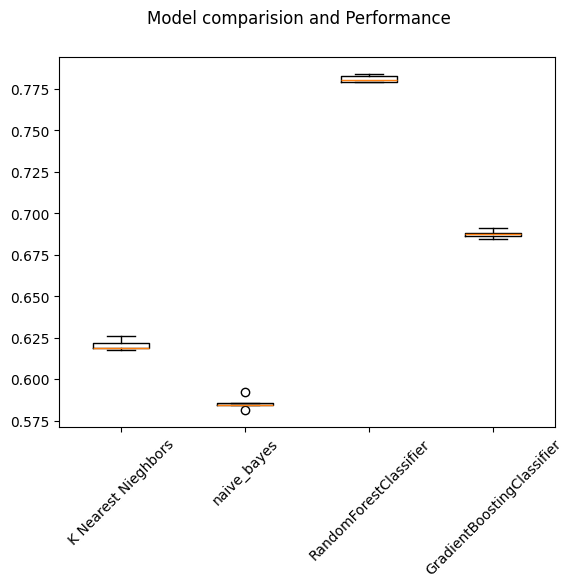

In [228]:
import sklearn

# evaluate each model in turn
results = []
names = []


for name, model in models:
    kfold = sklearn.model_selection.KFold(n_splits=5)

    cv_results = sklearn.model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, np.median(cv_results), cv_results.std())
    print(msg)



# comparision of Algorithms using Boxplots
fig = plt.figure()
fig.suptitle('Model comparision and Performance')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation=45)
plt.show()

The boxplot and the printed scores provide a comparison of the performance of four different machine learning models: K Nearest Neighbors, Naive Bayes, RandomForestClassifier, and GradientBoostingClassifier. These models are evaluated based on their cross-validation scores.

##### From the data:

##### K Nearest Neighbors (KNN): 
Median accuracy is approximately 0.619 (0.002947)
##### Naive Bayes: 
Median accuracy is approximately 0.584 (0.003585)
##### RandomForestClassifier: 
Median accuracy is approximately 0.780 (0.002039)
##### GradientBoostingClassifier: 
Median accuracy is approximately 0.687 (0.002210)

##### Performance Comparison:

* RandomForestClassifier has the highest median accuracy (0.780), indicating it performs the best among the models evaluated.
* GradientBoostingClassifier is the second-best model with a median accuracy of 0.687.
* K Nearest Neighbors (KNN) has a median accuracy of 0.619.
* Naive Bayes has the lowest median accuracy of 0.584.

##### Consistency:

* The standard deviation of the cross-validation scores indicates the consistency of the models.
* RandomForestClassifier has the smallest standard deviation (0.002039), indicating it has the most consistent performance.
* Naive Bayes has the highest standard deviation (0.003585), indicating more variability in its performance.

##### Best Model:
Based on both median accuracy and consistency, the RandomForestClassifier is the best model among the four. It not only achieves the highest median accuracy but also has the lowest standard deviation, indicating consistent performance across different folds of the cross-validation.

<a id = "fi"></a>
## <span style = "font-style:italic;color:black"> FEATURE IMPORTANCE <span>

In [210]:
# print feature importance for Random Forest
print("Feature Importance:")
impo_features = pd.DataFrame(random_forest.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = "Imp", ascending= False)
impo_features

Feature Importance:


Imp
Outstanding_Debt                                    0.150052
Interest_Rate                                       0.109726
Credit_History_Age                                  0.096567
Changed_Credit_Limit                                0.088759
Delay_from_due_date                                 0.087368
Monthly_Balance                                     0.080598
Amount_invested_monthly                             0.078633
Total_EMI_per_month                                 0.074608
Num_Credit_Inquiries                                0.065699
Num_Bank_Accounts                                   0.047936
Num_of_Loan                                         0.036355
Payment_of_Min_Amount_Yes                           0.026026
Payment_of_Min_Amount_No                            0.018455
Payment_Behaviour_Low_spent_Small_value_payments    0.008709
Payment_Behaviour_High_spent_Medium_value_payments  0.008683
Payment_Behaviour_Low_spent_Medium_value_payments   0.007644
Payment_Behaviour_High_spent_Small_value_payments   0.007302
Payment_Behaviour_Low_spent_Large_value_payments    0.006880

In [211]:
impo_features.index

Index(['Outstanding_Debt', 'Interest_Rate', 'Credit_History_Age',
       'Changed_Credit_Limit', 'Delay_from_due_date', 'Monthly_Balance',
       'Amount_invested_monthly', 'Total_EMI_per_month',
       'Num_Credit_Inquiries', 'Num_Bank_Accounts', 'Num_of_Loan',
       'Payment_of_Min_Amount_Yes', 'Payment_of_Min_Amount_No',
       'Payment_Behaviour_Low_spent_Small_value_payments',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_Low_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payment_Behaviour_Low_spent_Large_value_payments'],
      dtype='object')

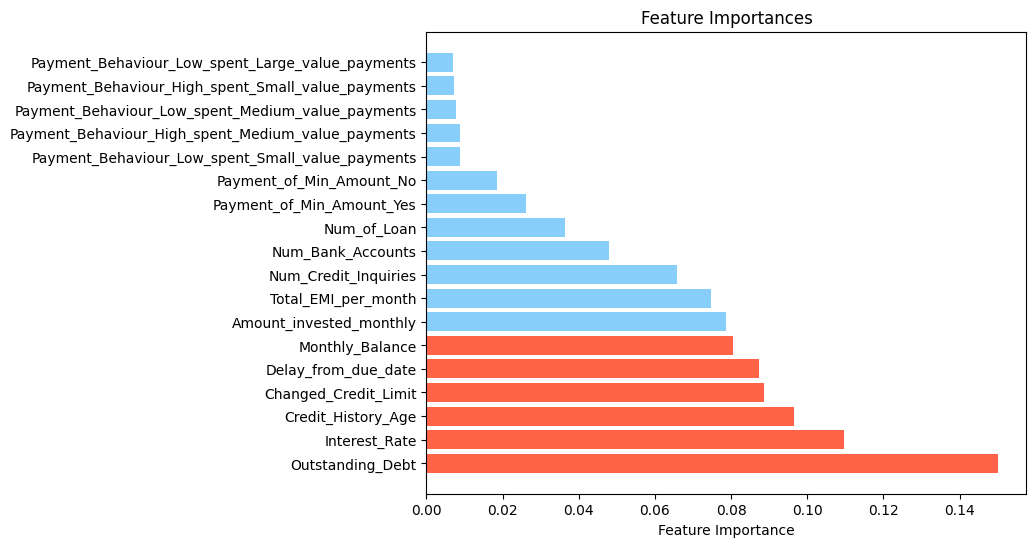

In [212]:
# Sort the feature importances in descending order
sorted_idx = np.argsort(impo_features['Imp'])[::-1]
feature_names = [i for i in impo_features.index]
feature_importances = [i for i in impo_features.Imp]

# Set the colors for the bars
colors = ['#FF6347' if importance > 0.08 else '#87CEFA' for importance in feature_importances]

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(range(len(feature_importances)), feature_importances, color=colors, align='center')
ax.set_yticks(range(len(feature_names)))
ax.set_yticklabels(feature_names)
ax.set_xlabel('Feature Importance')
ax.set_title('Feature Importances')

# Rotate the labels for better visibility
plt.subplots_adjust(left=0.3)
plt.show()

In [213]:
top10_features = impo_features.index[:10].tolist()
top10_features

['Outstanding_Debt',
 'Interest_Rate',
 'Credit_History_Age',
 'Changed_Credit_Limit',
 'Delay_from_due_date',
 'Monthly_Balance',
 'Amount_invested_monthly',
 'Total_EMI_per_month',
 'Num_Credit_Inquiries',
 'Num_Bank_Accounts']

In [214]:
X_train_imp = X_train[top10_features]
X_test_imp = X_test[top10_features]

In [218]:
param_grid = {     
    'n_estimators': [100 , 200 , 300 , 400],     
    'criterion': ["gini", "entropy", "log_loss"],     
    'max_depth': [None, 5, 10, 20, 50],
    'min_samples_split': [2, 5, 10, 20],
    'max_features': ['sqrt', 'log2', None, 0.3, 0.5],
    'random_state' : [42 , 10 , 50 , 1]
} 

In [219]:
best_params, best_score = find_best_parameters(RandomForestClassifier(), param_grid, X_train_imp, y_train) 
print('Best Parameters:', best_params) 
print('Best Score:', best_score)  

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 42}
Best Score: 0.7858977247127732


<a id = "final"></a>
## <span style = "font-style:italic;color:black"> FINAL MODEL <span>

In [220]:
# Initialize the Random Forest classifier
random_forest_final = RandomForestClassifier(n_estimators=100, 
                                             random_state=42, 
                                             criterion='gini' ,
                                             max_depth=None, 
                                             min_samples_split=2 , 
                                             max_features= 'sqrt')

# Fit the model to the training data
random_forest_final.fit(X_train_imp, y_train)

RandomForestClassifier(random_state=42)

In [221]:
# Make predictions on the testing data
y_pred_random_forest = random_forest_final.predict(X_test_imp)

# Calculate F1-score for Random Forest model652\8
f1_random_forest = f1_score(y_test, y_pred_random_forest, average='weighted')

In [222]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_random_forest))

print("F1-score for Random Forest classifier:", f1_random_forest)

Classification Report:
              precision    recall  f1-score   support

           1       0.74      0.71      0.72      2824
           2       0.81      0.81      0.81      8761
           3       0.80      0.82      0.81      5062

    accuracy                           0.79     16647
   macro avg       0.78      0.78      0.78     16647
weighted avg       0.79      0.79      0.79     16647

F1-score for Random Forest classifier: 0.7939078005373231


##### Interpretation of the Base Model Performance:

##### Precision:

For class 1 (Poor credit score), the precision is 0.65, which means that 65% of the instances predicted as class 1 are actually class 1. This is relatively low compared to the other two classes.<br>
For class 2 (Standard credit score), the precision is 0.78, which is decent.<br>
For class 3 (Good credit score), the precision is 0.77, which is also decent.


##### Recall:

For class 1, the recall is 0.65, which means that the model correctly identified 65% of the actual class 1 instances.<br>
For class 2, the recall is 0.77, which is relatively good.<br>
For class 3, the recall is 0.79, which is also good.


##### F1-score:

The F1-scores for classes 1, 2, and 3 are 0.65, 0.77, and 0.78, respectively, indicating a reasonable balance between precision and recall for classes 2 and 3, but lower performance for class 1.


##### Accuracy:

The overall accuracy of the base model is 0.75, which means that the model correctly classified 75% of the instances.


##### Macro Average and Weighted Average:

The macro average F1-score is 0.73, which is the unweighted mean of the F1-scores for each class.
The weighted average F1-score is 0.75, which is the weighted mean of the F1-scores, considering the class imbalance.



Based on these metrics, the base model seems to perform reasonably well for classes 2 and 3 but struggles with class 1 (Poor credit score), which has lower precision and recall compared to the other two classes.

Comparing the base model to the final fitted model (the one you provided earlier), the key changes that had the most effect on improving model performance are:

Improved Precision for Class 1:<br> The precision for class 1 (Poor credit score) increased from 0.65 in the base model to 0.74 in the final fitted model, indicating better identification of true positives for this class.<br>
Improved F1-score for Class 1: The F1-score for class 1 increased from 0.65 in the base model to 0.72 in the final fitted model, suggesting a better balance between precision and recall for this class.<br>
Increased Overall Accuracy: The overall accuracy improved from 0.75 in the base model to 0.79 in the final fitted model, indicating that the model became better at correctly classifying instances across all classes.<br>
Improved Macro Average F1-score: The macro average F1-score increased from 0.73 in the base model to 0.78 in the final fitted model, suggesting an overall improvement in the model's performance across all classes.

These improvements could have been achieved through various techniques, such as feature engineering, hyperparameter tuning, handling class imbalance, or other model optimization strategies.

The key risks and limitations to consider for the base model and the final fitted model are similar to those mentioned in my previous response:

##### Data Quality:<br> 
The quality and representativeness of the training data can significantly impact the model's performance and reliability.<br>
##### Class Imbalance:<br> 
Although the base model and the final fitted model seem to handle class imbalance reasonably well, there is still a risk of biased predictions if the class imbalance is severe.<br>
##### Overfitting:<br> 
While the Random Forest algorithm is less prone to overfitting compared to some other algorithms, there is still a risk of overfitting if the hyperparameters are not tuned properly or if there are too many irrelevant features.<br>
##### Feature Relevance:<br> 
The model's performance may be suboptimal if the selected features are not truly relevant or informative for predicting the credit score.<br>
##### Data Leakage:<br> 
Any unintentional data leakage from the test set into the training process can lead to overly optimistic results and poor generalization to new data.<br>
##### Interpretability:<br> 
Although the Random Forest model provides feature importance, interpretability can still be a challenge due to the "black-box" nature of the algorithm.<br>
##### External Factors:<br> 
The model's predictions may not account for external factors or changes in the credit scoring system that could affect the credit score over time.<br>

To mitigate these risks, it's crucial to carefully preprocess and validate the data, handle class imbalance appropriately, tune the model's hyperparameters, and regularly monitor and update the model's performance on new data. Additionally, maintaining transparency and interpreting the model's predictions within the context of the underlying data and assumptions is essential.